# Instalación de python-chess

In [ ]:
# https://python-chess.readthedocs.io/en/latest/core.html
%pip install python-chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import chess

# Movimientos simples
Muestra cómo crear una instancia de un tablero, así como el movimiento de las piezas validando en todo momento que sean movimientos válidos para el jugador en turno.

In [ ]:
# ask for a move and checks if it's a valid (legal) move
import chess

board = chess.Board()
# test: g1f3 is valid/legal, g1e3 is invalid/illegal
while True:
    move = input('Enter the move you want to perform (i.e. g1f3 moves piece from g1 to f3): ')
    if move.lower() == 'stop':
        break
    move_Nf3 = chess.Move.from_uci(move)
    if move_Nf3 in board.legal_moves:
        board.push(move_Nf3)
    else:
        print(f'move {move_Nf3} is illegal')
    print(board)
    board

Enter the move you want to perform (i.e. g1f3 moves piece from g1 to f3): g1f3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R
Enter the move you want to perform (i.e. g1f3 moves piece from g1 to f3): stop


# Determinar turno
El tablero tiene una propiedad llamada `turn`. Esta propiedad almacena un valor booleano (`True|False`). Podemos saber a qué color le toca hacer un movimiento con base en lo siguiente:
- `True` corresponde a blanco.
- `False` corresponde a negro.

A continuación se muestra la lógica para determinar el turno.

Now it's WHITE turn!
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R

Now it's BLACK turn!
r . b q k b n r
p p p p p p p p
. . n . . . . .
. . . . . . . .
. . . . . . . .
. . . . . N . .
P P P P P P P P
R N B Q K B . R

Now it's WHITE turn!


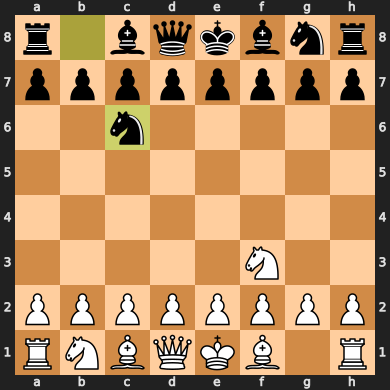

In [ ]:
import chess

def determine_turn(board: chess.Board) -> str:
    # equivalent: WHITE if board.turn == True else BLACK
    # equivalent: WHITE if board.turn is True else BLACK
    color_turn = "WHITE" if board.turn else "BLACK"
    return f"Now it's {color_turn} turn!"

def is_valid_move(move: chess.Move, board: chess.Board) -> bool:
    return move in board.legal_moves

board = chess.Board()
print(determine_turn(board))

white_move = chess.Move.from_uci('g1f3')
if is_valid_move(white_move, board):
    board.push(white_move)
print(board, end='\n\n')

print(determine_turn(board))

black_move = chess.Move.from_uci('b8c6')
if is_valid_move(black_move, board):
    board.push(black_move)
print(board, end='\n\n')

print(determine_turn(board))
board

# Conteo de piezas específicas
Realiza el conteo de las piezas del color especificado en el tablero actual (estado actual). Nos ayudará para el cálculo de la heurística.

8 9 10 11 12 13 14 15 

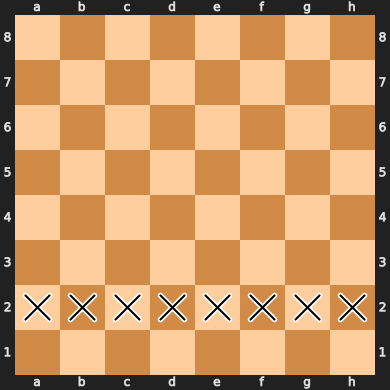

In [ ]:
# create a chess board and count how many chess pieces of type
# chess.PieceType with the specified chess.Color exists
import chess

board = chess.Board()

# return a SquareSet object with the current position of the chess.PieceType
# pieces with the specified chess.Color 
# Internally python-chess identifies squares left to right (a1 = 0 -> h1 = 7)
square_set = board.pieces(chess.PAWN, chess.WHITE)

len(square_set)
for position in square_set:
    print(position, end=" ")
square_set

In [ ]:
print(square_set)
print(type(board.pieces(chess.PAWN, chess.BLACK)))

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
1 1 1 1 1 1 1 1
. . . . . . . .
<class 'chess.SquareSet'>


In [ ]:
king_square_index = board.king(chess.WHITE)
print(king_square_index)
king_square_name = chess.square_name(king_square_index)
#print(king_square_name) # str
#print(chess.A2) # int
print(king_square_name)
king_square = chess.SQUARE_NAMES.index(king_square_name)
print(chess.SQUARE_NAMES)
#chess.square_distance(chess.A2, chess.A8)
chess.square_distance(king_square, chess.A5) # solo calcula para llegar a col A

# TODO: hacer función get_distance como la de 8-puzzle porque square_distance 
# solo saca la distancia a la misma linea

4
e1
['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'a2', 'b2', 'c2', 'd2', 'e2', 'f2', 'g2', 'h2', 'a3', 'b3', 'c3', 'd3', 'e3', 'f3', 'g3', 'h3', 'a4', 'b4', 'c4', 'd4', 'e4', 'f4', 'g4', 'h4', 'a5', 'b5', 'c5', 'd5', 'e5', 'f5', 'g5', 'h5', 'a6', 'b6', 'c6', 'd6', 'e6', 'f6', 'g6', 'h6', 'a7', 'b7', 'c7', 'd7', 'e7', 'f7', 'g7', 'h7', 'a8', 'b8', 'c8', 'd8', 'e8', 'f8', 'g8', 'h8']


4

In [ ]:
print(chess.A1)

0


## Pawn distance for promotion

In [ ]:
piece_positions = board.pieces(chess.PAWN, chess.WHITE)
whites_goal = {'a': chess.A8, 'b': chess.B8, 'c': chess.C8, 'd': chess.D8, 
               'e': chess.E8, 'f': chess.F8, 'g': chess.G8, 'h': chess.H8}
blacks_goal = {'a': chess.A1, 'b': chess.B1, 'c': chess.C1, 'd': chess.D1, 
               'e': chess.E1, 'f': chess.F1, 'g': chess.G1, 'h': chess.H1}
for piece in piece_positions:
    pawn_square_name = chess.square_name(piece)
    pawn_square = chess.SQUARE_NAMES.index(pawn_square_name)
    distance = chess.square_distance(pawn_square, whites_goal[pawn_square_name[0]])
    print(distance)


6
6
6
6
6
6
6
6


# Heurística
Calcula la heurística del estado actual del tablero.

In [ ]:
import chess

def pieces_heuristic(board: chess.Board, maximize_player: bool) -> int:
    """Calculate the heuristic of a given board as the difference
    between black pieces points and white pieces points. If we are
    maximizing player, then we perform white points - black points.
    black points - white points is performed otherwise.

    Parameters
    ----------
    - `board`: an instance of chess#Board class, the current game board
    - `maximize_player`: tells if we're maximizing the player or not

    Returns
    -------
    `h(n)`: an integer representing the heuristic for the given `board`
    """
    # Calculate white and black pieces points
    # chess.PAWN = 1, chess.KNIGHT = 2 and so on...
    pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
    white_points = black_points = 0

    piece_positions = None
    # Calculate white pieces points
    for piece in pieces:
        # board.pieces returns a SquareSet containing
        # the squares where piece_type was found. len(board.pieces) returns
        # how many piece_type pieces were found.
        piece_positions = board.pieces(piece_type=piece, color=chess.WHITE)
        white_points += len(piece_positions) * piece

    # Calculate black pieces points
    for piece in pieces:
        piece_positions = board.pieces(piece_type=piece, color=chess.BLACK)
        black_points += len(piece_positions) * piece

    if maximize_player:
        h = white_points - black_points
    else:
        h = black_points - white_points

    return h

def move_heuristic(board: chess.Board) -> int:
    """Calculate the heuristic of a given board as the number of possible legal
    moves of the current player"""
    return len(list(board.legal_moves))

def chess_heuristic(board: chess.Board, maximize_player: bool) -> int:
    """Calculate the heuristic of a given board as the addition of pieces
    heuristic and move heuristic"""
    return pieces_heuristic(board, maximize_player) + move_heuristic(board)

print(pieces_heuristic(chess.Board(), True)) # should return 0
print(move_heuristic(chess.Board()))
print(chess_heuristic(chess.Board(), True))

0
20
20


# Filtrado de movimientos
¿Qué pasa si en un determinado turno yo quisiera conocer los posibles movimientos de las piezas del jugador? Simple, puedo conocer los movimientos legales del jugador en turno accediendo a la propiedad `board.legal_moves` (el cuál es un objeto `generator`). Pero, ¿cómo puedo saber los movimientos legales de una pieza especifica, o mejor dicho, de un conjunto de piezas similares (por ejemplo, los movimientos de todos los caballeros blancos actuales) de un determinado turno? Esto último es lo que se implementará en la siguiente celda.

[]


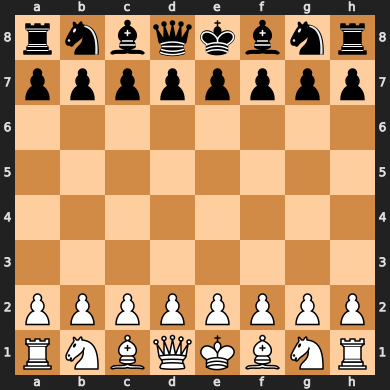

In [ ]:
import chess

def filter_moves_for(piece: chess.PieceType, board: chess.Board):
    """Filter the moves for the specified chess piece in the
    current board"""
    possible_moves = []
    # contains the squares where we can find a piece in current board state
    squares = []
    legal_moves = [str(move) for move in board.legal_moves]
    for move in legal_moves:
        # a move contains the start square and ends with the end square
        # for example: g1f3 stands for move piece from g1 to f3
        square = move[:2] # get the start square
        squares.append(square) 
    # as a single piece may have at least 1 possible move
    # we have repeated start squares, so we create a set to delete duplicates
    squares = set(squares)
    # here we filter the moves to store just the ones associated
    # with piece we are interested in
    filter_piece_positions = lambda square: board.piece_type_at(chess.parse_square(square)) == piece
    piece_positions = list(filter(filter_piece_positions, squares)) # stores each start square of the piece
    for move in legal_moves:
        for piece_position in piece_positions:
            if move.startswith(piece_position):
                possible_moves.append(move)
    return sorted(possible_moves)

board = chess.Board()
print(filter_moves_for(chess.KNIGHT, board))
board

# Copia de un tablero
Esta celda muestra cómo crear una copia del tablero en un momento determinado. Debemos tener en cuenta que una vez que creamos la instancia del objeto `chess.Board` todos los movimientos que se hagan o deshagan (`board.push()` y `board.pop()`) se realizan sobre esta instancia. Por eso puede resultar útil realizar una copia del tablero en un momento determinado para guardar ese estado.

In [ ]:
import chess

board = chess.Board()
initial_board = board.copy()

board.push(chess.Move.from_uci('f1g3')) # make a move
print('Current board state')
print(board, end='\n\n') # our current board is modified
print('Initial board state')
# initial state is intact, similar to list copy using list slicing
print(initial_board, end='\n\n')

Current board state
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . B .
P P P P P P P P
R N B Q K . N R

Initial board state
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R



# Heurística prueba

In [ ]:
# self.max_scores_heuristic = [cuando_estan_todas_las_piezas, cuando_dist_=1?, max_ataque, max_defensa]

In [ ]:
from sklearn import preprocessing
from math import exp
scores = [7, 9, 2, 1]
weights = [0.04, 0.03, 0.6, 0.3]
normalized_arr = preprocessing.normalize([scores])
print(type(normalized_arr[0][0]))
sum_ = 0
for i in range(len(scores)):
    sum_ += weights[i]*scores[i]
print(normalized_arr)
print(sum_)
sig = 1 / (1 + exp(-sum_))
print(sig)

scores = [1, 1, 9, 2]
normalized_arr = preprocessing.normalize([scores])
sum_ = 0
for i in range(len(scores)):
    sum_ += weights[i]*scores[i]
print(normalized_arr)
print(sum_)
sig = 1 / (1 + exp(-sum_))
print(sig)

<class 'numpy.float64'>
[[0.60246408 0.77459667 0.17213259 0.0860663 ]]
2.05
0.8859476187202091
[[0.10721125 0.10721125 0.96490128 0.21442251]]
6.069999999999999
0.9976941559942918


# ChessAI Class
Clase similar a `Nodo` para representar un estado específico del tablero y sus hijos.

white score = 37, black score = 37


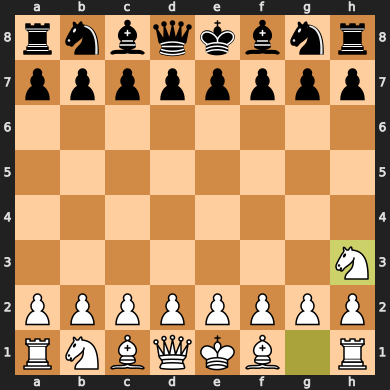


white score = 37, black score = 37


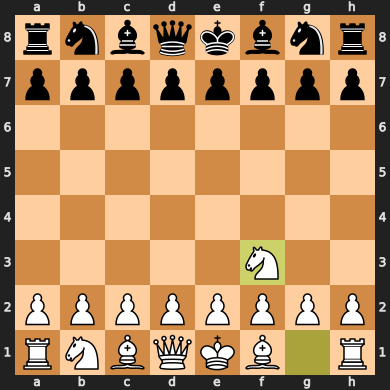


white score = 37, black score = 37


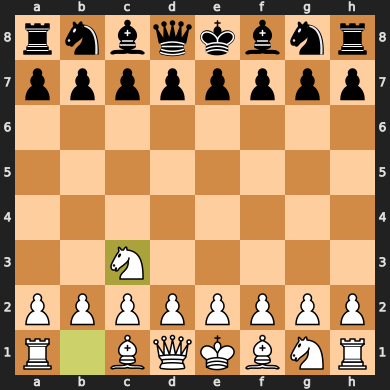


white score = 37, black score = 37


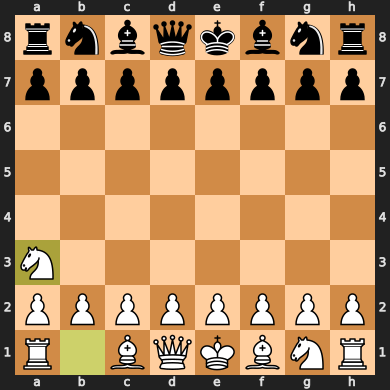


white score = 37, black score = 37


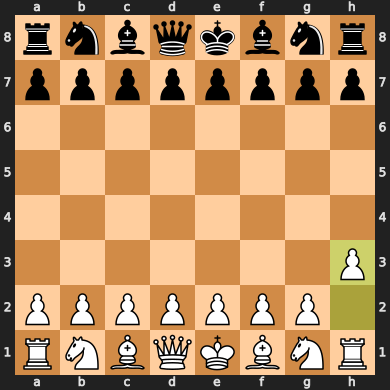


white score = 37, black score = 37


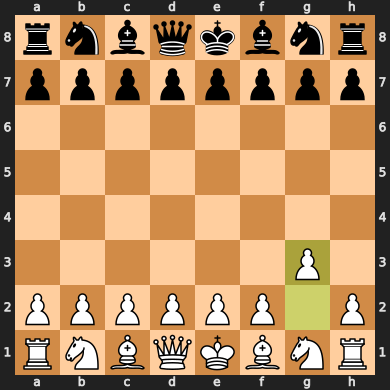


white score = 37, black score = 37


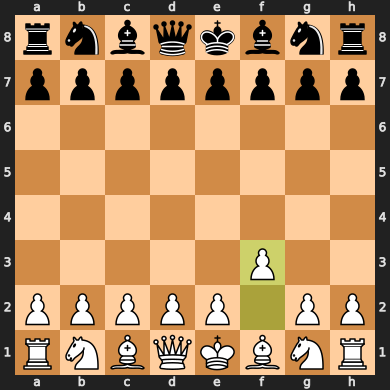


white score = 37, black score = 37


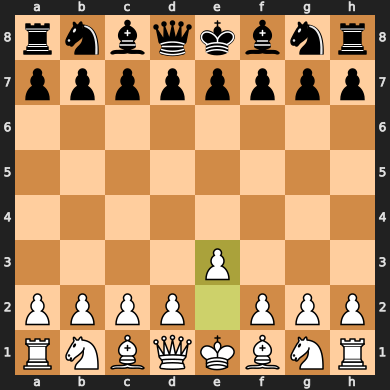


white score = 37, black score = 37


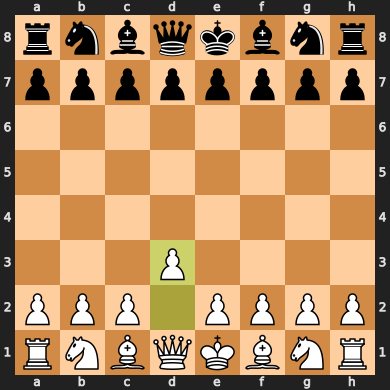


white score = 37, black score = 37


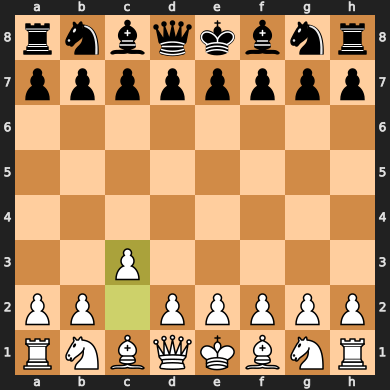


white score = 37, black score = 37


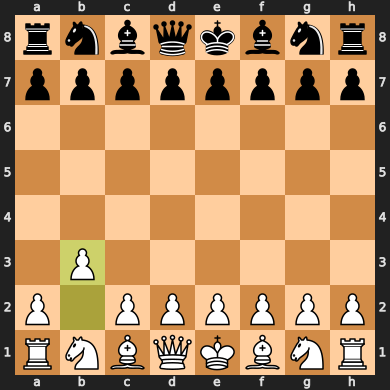


white score = 37, black score = 37


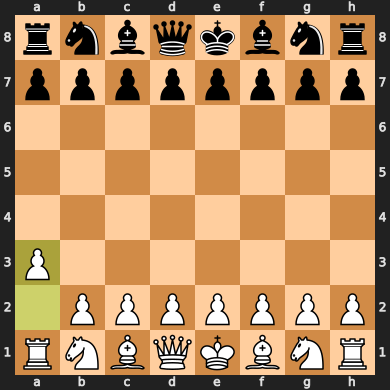


white score = 37, black score = 37


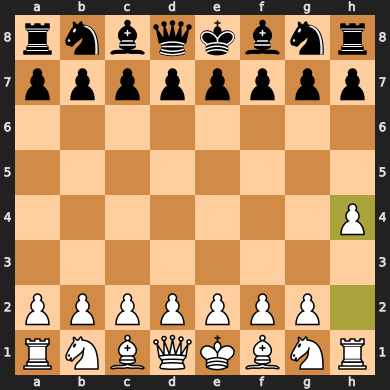


white score = 37, black score = 37


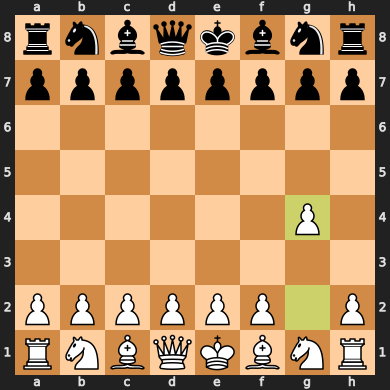


white score = 37, black score = 37


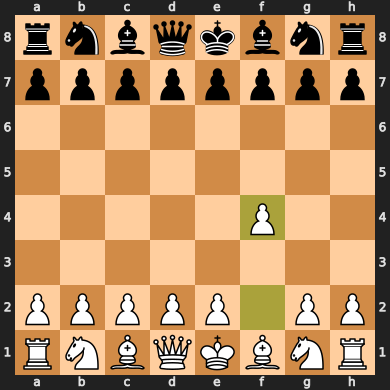


white score = 37, black score = 37


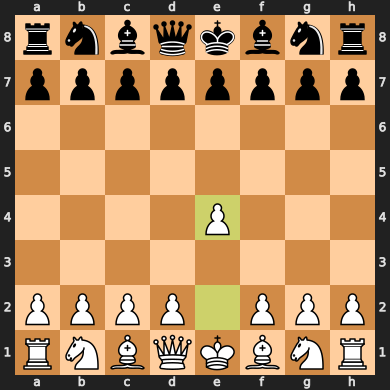


white score = 37, black score = 37


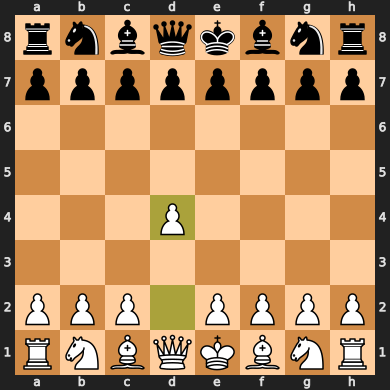


white score = 37, black score = 37


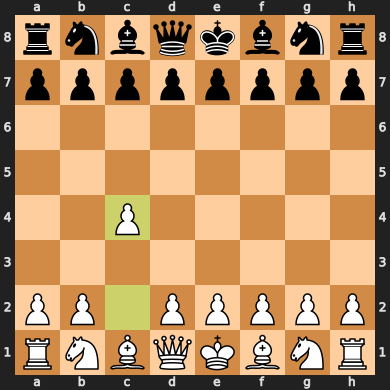


white score = 37, black score = 37


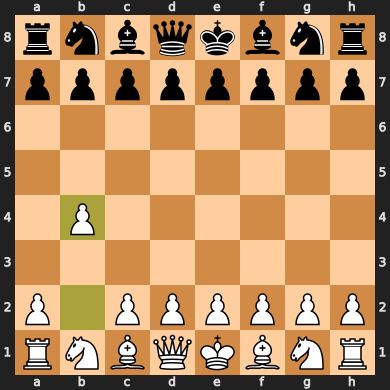


white score = 37, black score = 37


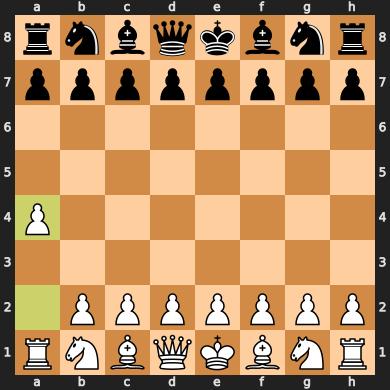

In [ ]:
import chess
from math import inf
import random
import chess.svg

class ChessAI():
    # Is better idea to have a board parameter, so instead of creating a new node
    # with a new instance of chess.Board we pass it a variable-state board
    def __init__(self, board: chess.Board):
        '''
        Pieces:                 Weights
        pawn = chess.PAWN          1
        knight = chess.KNIGHT      2
        bishop = chess.BISHOP      3        
        rook = chess.ROOK          4
        queen = chess.QUEEN        5
        king = chess.KING          6
        '''
        self.board = board
        self.chess_pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
        # stores children for current self.board. Each children is calculated
        # performing the moves in board.legal_moves
        self.children = []

    def __repr__(self):
        # called when doing print(ChessAI instance), e.g. root = ChessAI() print(root)
        return str(self.board)

    def get_moves(self, board=None):
        '''
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @moves (list) = the list of moves of the corresponding turn
        '''
        moves = []
        # for other board (useful when getting son moves)
        if board == None:
            board = self.board

        for move_ in board.legal_moves:
            moves.append(str(move_))
        return moves
    
    def is_valid_move(self, move:chess.Move, board=None):
        '''
        Checks if a specific move is valid\n
        Parameters:
        @move (chess.Move) = move including start point and end point (i.e. 'g1f3')
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @(bool) = if the move is valid
        '''
        if board == None:
            board = self.board
        # Delegate responsability of checking if move is legal in python-chess (Eduardo)
        return board.is_legal(move)
    
    def move(self, move:str, board=None):
        '''
        Makes a move after checking if it's valid\n
        Parameters:
        @move (str) = move to make
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        '''
        if board == None:
            board = self.board

        move_ = chess.Move.from_uci(move)
        if self.is_valid_move(move_, board=board):
            board.push(move_)

    def determine_turn(self, board=None):
        '''
        Gets whose turn is it\n
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        
        Return:
        @(str) = "WHITE" or "BLACK"
        '''
        if board == None: # uses self.board
            board = self.board
        # would be better to return chess.WHITE/chess.BLACK instead of strings? (Eduardo)
        color_turn = "WHITE" if board.turn else "BLACK"

        return color_turn

    def count_pieces(self, chess_piece: chess.PieceType, color, board=None):
        '''
        Counts pieces of a specific piece color in the current state.
        
        '''
        if board == None:
            board = self.board

        # TODO: ¿se puede actualizar la lista de piezas en cada jugada (self.chess_pieces)?
        # a qué te refieres o con qué propósito? (Eduardo)
        # es que estaba pensando que cada vez que se comieran una pieza durante
        # el juego desapareciera de la lista, pero ya vi que no es óptimo hacer 
        # eso jeje
        piece_positions = board.pieces(chess_piece, color)

        return len(piece_positions)

    def get_score(self, color: chess.Color, board=None):
        '''
        Calculate the score for `color` turn as the total weights sum of its
        pieces.

        Parameters
        ---------
        - `color`: the piece color. Can be `chess.WHITE` or `chess.BLACK`
        - `board`: optional parameter that receives another board. If not passed,
        the board associated with these node is used instead

        Returns
        -------
        - `score`: the score for player with `color` pieces
        '''
        if board == None:
            board = self.board

        score = 0
        for chess_piece in self.chess_pieces:
            score += self.count_pieces(chess_piece, color) * chess_piece

        return score

    def pieces_heuristic(self, *, maximize_player: bool, board: chess.Board=None) -> int:
        """Calculate the heuristic of a given board as the difference
        between black pieces points and white pieces points. If we are
        maximizing player, then we perform white points - black points.
        black points - white points is performed otherwise.

        Parameters
        ----------
        - `board`: optional instance of chess#Board class. If not passed self.board
        is used
        - `maximize_player`: tells if we're maximizing the player or not

        Returns
        -------
        `h(n)`: an integer representing the heuristic for the given `board`
        """
        # NOTE: We can use the get_score function and pass each color to get the
        # scores
        # UPDATE: functionality implemented as mentioned in NOTE (Eduardo)

        # Calculate white and black pieces points
        white_points = self.get_score(chess.WHITE)
        black_points = self.get_score(chess.BLACK)

        if maximize_player:
            h = white_points - black_points
        else:
            h = black_points - white_points

        return h

    def pawn_promotion(self, color: chess.Color):
        # Opción 1:
        #   solo retornar el nearest_pawn
        # Opción 2:
        #   retornar suma de las distancias
        #   entre menor sea la distancia mejor

        # **NOTA**: necesitamos normalizar las medidas que usemos para el score
        # porque por ejemplo el score de piezas va a dar un numero por ejemplo
        # 15, y el de pawn_promotion puede dar 48 si se aplica la opción 2, 
        # por lo que podría dar más bias al de peones y muy poco al de score.
        # Normalizando cada medida, podemos posteriormente darle pesos
        # 0.2*pieces_heuristic + 0.8*pawn_promotion
        # o algo así

        white_pawns_goal = {
            'a': chess.A8, 'b': chess.B8, 'c': chess.C8, 'd': chess.D8, 
            'e': chess.E8, 'f': chess.F8, 'g': chess.G8, 'h': chess.H8}
        black_pawns_goal = {
            'a': chess.A1, 'b': chess.B1, 'c': chess.C1, 'd': chess.D1, 
            'e': chess.E1, 'f': chess.F1, 'g': chess.G1, 'h': chess.H1}

        if color == chess.WHITE:
            goal = white_pawns_goal
        else:
            goal = black_pawns_goal

        piece_positions = board.pieces(chess.PAWN, color)
        sum_distances = 0

        for piece in piece_positions:
            pawn_square_name = chess.square_name(piece)
            pawn_square = chess.SQUARE_NAMES.index(pawn_square_name)
            distance = chess.square_distance(pawn_square, goal[pawn_square_name[0]])
            sum_distances += distance
        
        return sum_distances # entre menor sea sum_distances mejor

    # TODO: hacer función get_distance como la de 8-puzzle porque square_distance 
    # solo saca la distancia a la misma linea 
    def distance(self, square_name_1, square_name_2):
        # square_name_1 -> (str)
        pass


    def attack_king(self):
        # 1. ¿Cuántas piezas atacan/pueden atacar al rey? (entre más mejor)
        #    maximizar piezas que ataquen
        # 2. si al ejecutar un movimiento, nos acercamos al rey (no tanto para
        #    que no nos coma, depende de la pieza) mejor
        # 3. LIMITAR LOS MOVIMIENTOS DEL REY CON PIEZAS ENEMIGAS
        pass

    def protect_king(self):
        # 1. Cubrir los puntos en los que el rey esté en jaque protegiendo esas
        #    celdas con piezas o atacando esa celda con una pieza
        # 2. Disminuir las piezas que ataquen al rey
        # 3. 
        pass

    def heuristic(self, color: chess.Color):
        # aquí va:
        # 1. recibir los datos de cada evaluación y ponerlos en lista
        # 2. declarar vector de pesos
        # 3. normalizar entradas
        # 4. aplicar sigmoid(x)
        # 5. retornar porcentaje 
        pass

    def filter_moves_for(self, piece: chess.PieceType, board: chess.Board=None):
        """
        Filter the moves for the specified chess piece in the
        current board

        Parameters:
        -----------
        - `piece`: chess piece to filter
        - `board`: optionar chess board. If not passed, self.board is used instead

        Returns:
        --------
        A sorted list containing the possible moves UCI strings for the given
        chess piece
        """
        possible_moves = []
        # contains the squares where we can find a piece in current board state
        squares = []
        if board == None:
            board = self.board
        legal_moves = self.get_moves()
        for move in legal_moves:
            # a move contains the start square and ends with the end square
            # for example: g1f3 stands for move piece from g1 to f3
            square = move[:2] # get the start square
            squares.append(square) 
        # as a single piece may have at least 1 possible move
        # we have repeated start squares, so we create a set to delete duplicates
        squares = set(squares)
        # here we filter the moves to store just the ones associated
        # with piece we are interested in
        filter_piece_positions = lambda square: board.piece_type_at(chess.parse_square(square)) == piece
        piece_positions = list(filter(filter_piece_positions, squares)) # stores each start square of the piece
        for move in legal_moves:
            for piece_position in piece_positions:
                if move.startswith(piece_position):
                    possible_moves.append(move)
        return sorted(possible_moves)

    def copy_board(self):
        return self.board.copy()

    def minimax(self, depth: int, maximize_player: bool, board=None):
        #Calculas el mejor movimiento de acuedo a la heurìstica implementada
        #Se calcula de forma recursiva
        if board == None:  # uses self.board
            board = self.board
        #esta es nuestra condicion de paro, donde esta nos devolverà la heuristica
        if depth == 0 or board.is_game_over():
            return None, self.heuristic(maximize_player) # Mariana: aquí no solo sería self.minimax()?
        #Obtenemos todos los movimientos legales e inicializamos el mejor movimiento conn uno random
        legal_moves = [str(move) for move in board.legal_moves]
        best_move = random.choice(legal_moves) # 
        
        #Calcula el mejor movimiento dependiendo del maximize_player, de manera recursiva
        if maximize_player:
            max_eval = -inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, False)[1]
                board.pop()
                if current_eval > max_eval:
                    max_eval = current_eval
                    best_move = move
                return best_move, max_eval
        else:
            min_eval = inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, True)[1]
                board.pop()
                if current_eval < min_eval:
                    min_eval = current_eval
                    best_move = move
                return best_move, min_eval

    def get_children(self):
        '''
        Gets son nodes after expanding the current node. Son nodes are stored
        at self.children.

        Returns
        -------
        The number of children for this node
        '''
        for move in self.board.legal_moves:
            board_copy = self.copy_board()
            board_copy.push(move)
            self.children.append(ChessAI(board_copy))

        return len(self.children)
    
root = ChessAI(chess.Board())
root.get_children()
for child in root.children:
    white_points = child.get_score(chess.WHITE)
    black_points = child.get_score(chess.BLACK)
    print(f'white score = {white_points}, black score = {black_points}')
    display(child.board)
    print()

# Board display

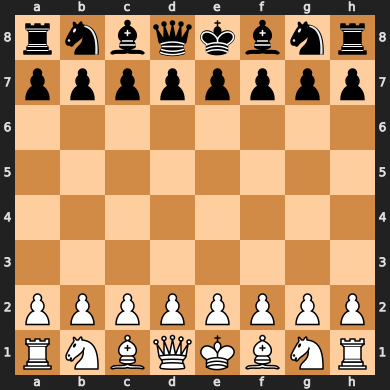

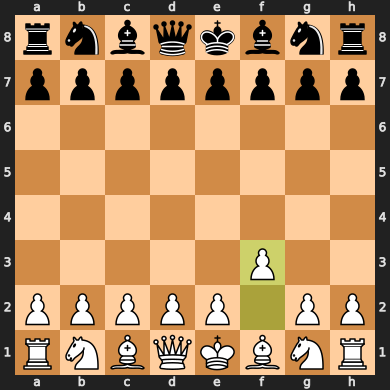

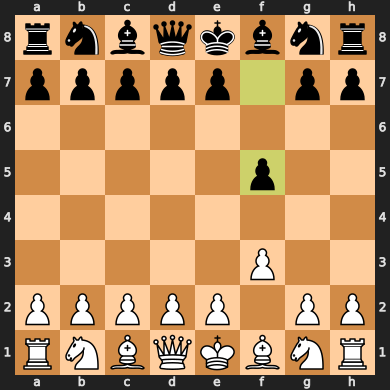

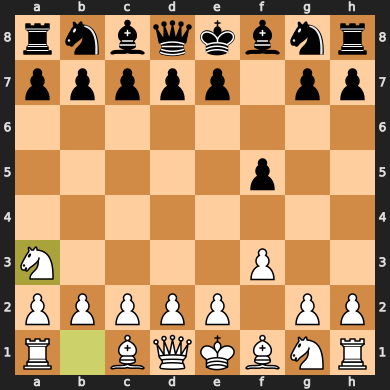

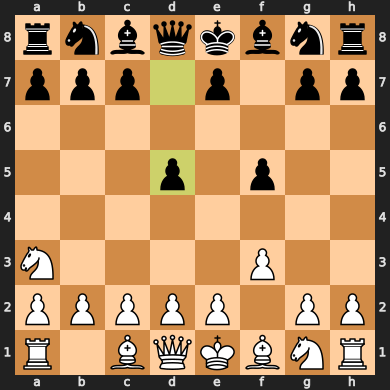

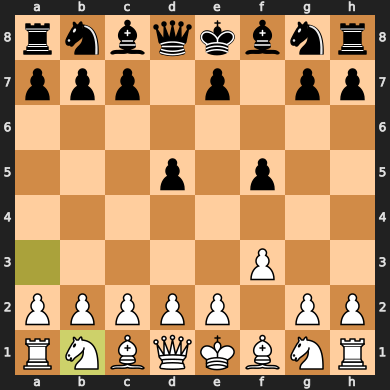

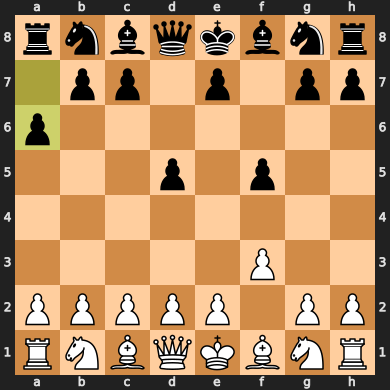

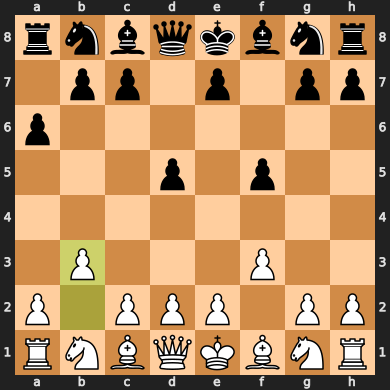

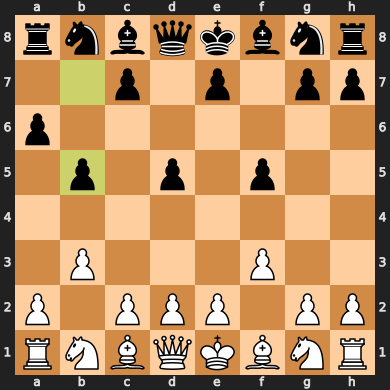

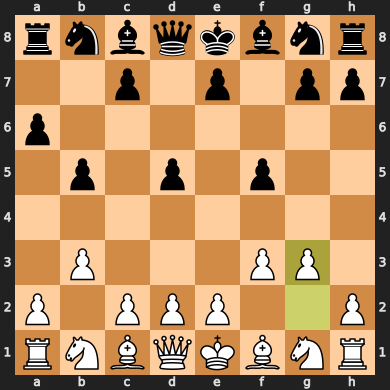

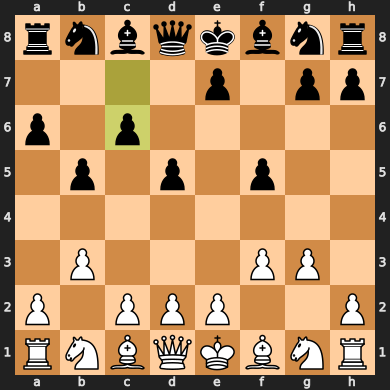

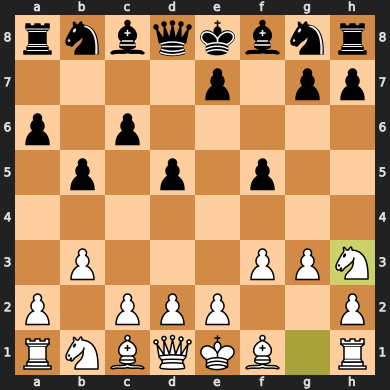

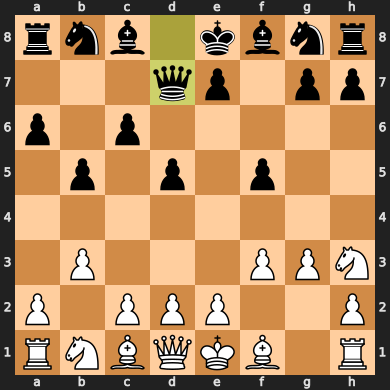

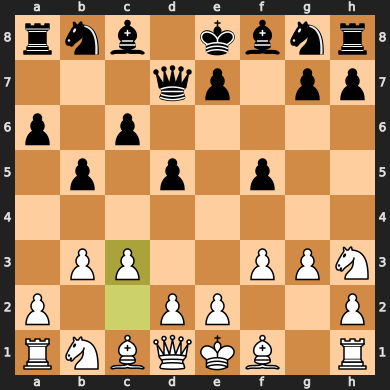

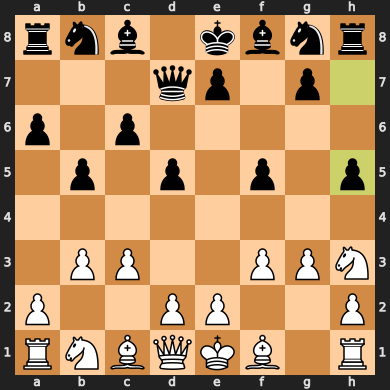

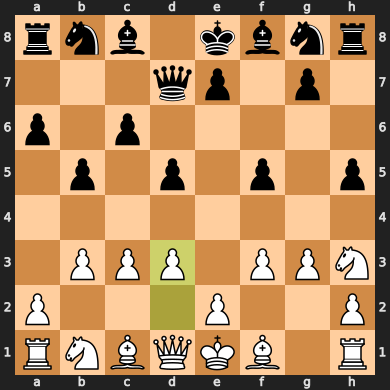

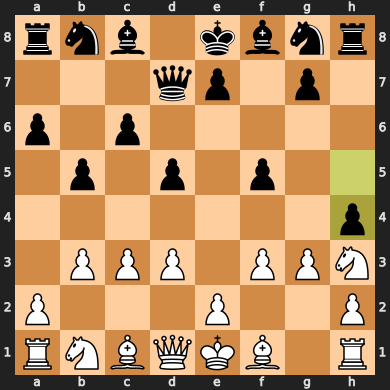

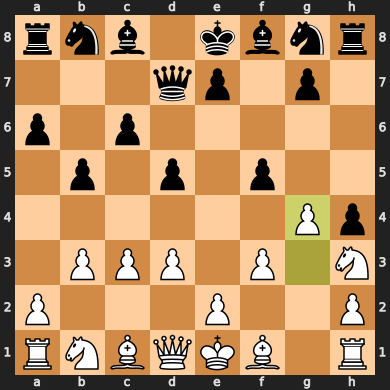

In [ ]:
import random
import chess
import chess.svg

board = chess.Board()
display(board)
# el for es solo para probar que display se ejecuta en cada iteración
# a diferencia de poner solamente board
for _ in board.legal_moves:
    board.push(random.choice(list(board.legal_moves)))
    display(board)

# Prueba IA Con codigo de KEVIN


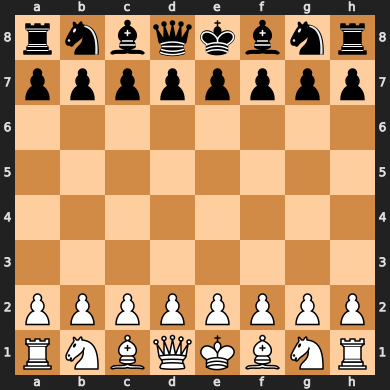

Es tu turno, dame un movimiento: g1f3


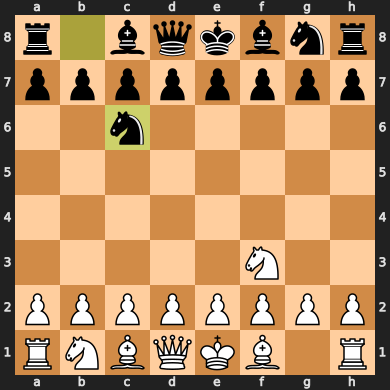

evaluacion=  50.23052219967965


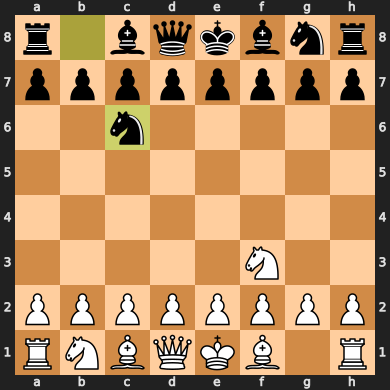

Es tu turno, dame un movimiento: h2h5
Oops! Prueba con otro movimiento: h2h3


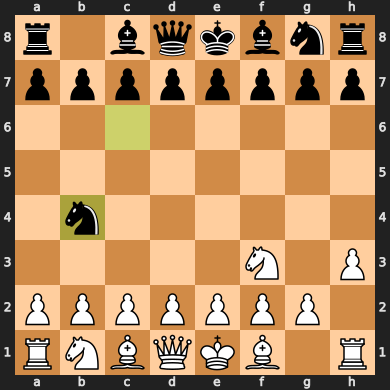

evaluacion=  50.38126120364098


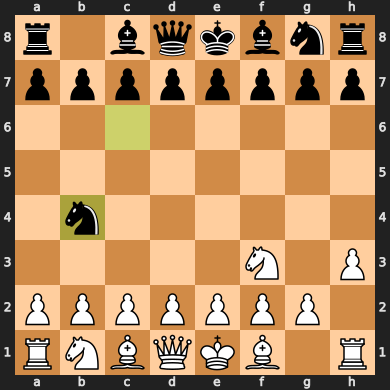

Es tu turno, dame un movimiento: a2a4


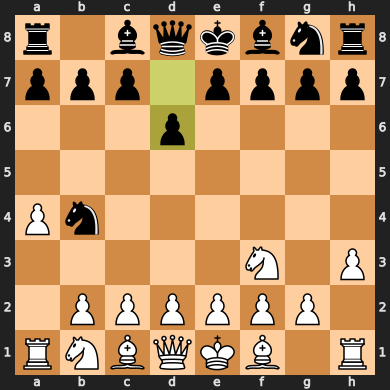

evaluacion=  50.35021268689221


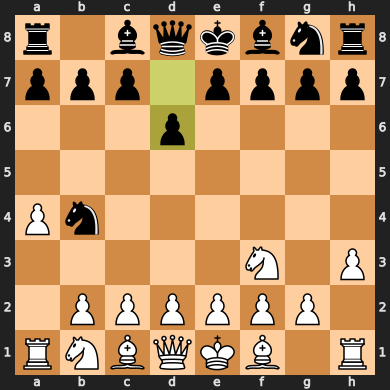

Es tu turno, dame un movimiento: h1h4
Oops! Prueba con otro movimiento: f3g5


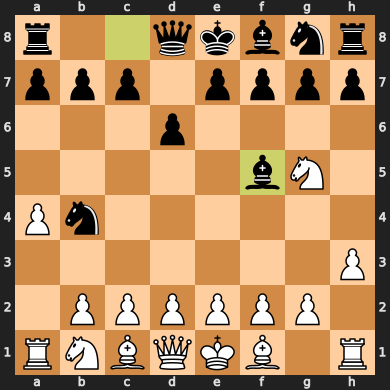

evaluacion=  50.36141908613862


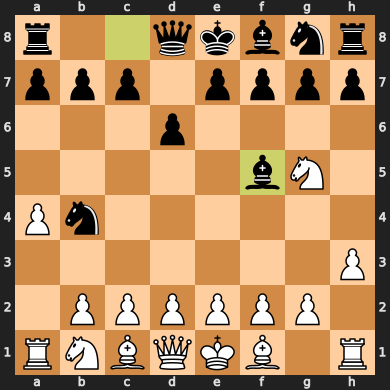

KeyboardInterrupt: ignored

In [ ]:
import chess
from math import inf, exp
import re
import random
from sklearn import preprocessing

class ChessAI():
    # Is better idea to have a board parameter, so instead of creating a new node
    # with a new instance of chess.Board we pass it a variable-state board
    PIECES_HEURISTIC = 0
    MIXED_HEURISTIC = 1

    def __init__(self, board: chess.Board):
        '''
        Pieces:                 Weights
        pawn = chess.PAWN          1
        knight = chess.KNIGHT      2
        bishop = chess.BISHOP      3        
        rook = chess.ROOK          4
        queen = chess.QUEEN        5
        king = chess.KING          6
        '''
        self.board = board
        self.chess_pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
        # stores children for current self.board. Each children is calculated
        # performing the moves in board.legal_moves
        self.children = []

    def __repr__(self):
        # called when doing print(ChessAI instance), e.g. root = ChessAI() print(root)
        return str(self.board)

    def get_moves(self, board=None):
        '''
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @moves (list) = the list of moves of the corresponding turn
        '''
        moves = []
        # for other board (useful when getting son moves)
        if board == None:
            board = self.board

        for move_ in board.legal_moves:
            moves.append(str(move_))
        
        return random.sample(moves,len(moves))
    
    def is_valid_move(self, move:chess.Move, board=None):
        '''
        Checks if a specific move is valid\n
        Parameters:
        @move (chess.Move) = move including start point and end point (i.e. 'g1f3')
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @(bool) = if the move is valid
        '''
        if board == None:
            board = self.board
        # Delegate responsability of checking if move is legal in python-chess (Eduardo)
        return board.is_legal(move)
    
    def move(self, move:str, board=None):
        '''
        Makes a move after checking if it's valid\n
        Parameters:
        @move (str) = move to make
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        '''
        if board == None:
            board = self.board

        move_ = chess.Move.from_uci(move)
        if self.is_valid_move(move_, board=board):
            board.push(move_)

    def determine_turn(self, board=None):
        '''
        Gets whose turn is it\n
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        
        Return:
        @(str) = "WHITE" or "BLACK"
        '''
        if board == None: # uses self.board
            board = self.board
        # would be better to return chess.WHITE/chess.BLACK instead of strings? (Eduardo)
        color_turn = "WHITE" if board.turn else "BLACK"

        return color_turn

    def count_pieces(self, chess_piece: chess.PieceType, color, board=None):
        '''
        Counts pieces of a specific piece color in the current state.
        
        '''
        if board == None:
            board = self.board

        # TODO: ¿se puede actualizar la lista de piezas en cada jugada (self.chess_pieces)?
        # a qué te refieres o con qué propósito? (Eduardo)
        # es que estaba pensando que cada vez que se comieran una pieza durante
        # el juego desapareciera de la lista, pero ya vi que no es óptimo hacer 
        # eso jeje
        piece_positions = board.pieces(chess_piece, color)

        return len(piece_positions)

    def get_score(self, color: chess.Color, board=None):
        '''
        Calculate the score for `color` turn as the total weights sum of its
        pieces.

        Parameters
        ---------
        - `color`: the piece color. Can be `chess.WHITE` or `chess.BLACK`
        - `board`: optional parameter that receives another board. If not passed,
        the board associated with these node is used instead

        Returns
        -------
        - `score`: the score for player with `color` pieces
        '''
        if board == None:
            board = self.board

        score = 0
        for chess_piece in self.chess_pieces:
            score += self.count_pieces(chess_piece, color) * chess_piece

        return score

    def pieces_heuristic(self, *, maximize_color = str, board: chess.Board=None) -> int:
        """Calculate the heuristic of a given board as the difference
        between black pieces points and white pieces points. If we are
        maximizing player, then we perform white points - black points.
        black points - white points is performed otherwise.

        Parameters
        ----------
        - `board`: optional instance of chess#Board class. If not passed self.board
        is used
        - `maximize_player`: tells if we're maximizing the player or not

        Returns
        -------
        `h(n)`: an integer representing the heuristic for the given `board`
        """
        # NOTE: We can use the get_score function and pass each color to get the
        # scores
        # UPDATE: functionality implemented as mentioned in NOTE (Eduardo)

        # Calculate white and black pieces points
        white_points = self.get_score(chess.WHITE)
        black_points = self.get_score(chess.BLACK)

        if maximize_color=="WHITE":
            h = white_points - black_points
        else:
            h = black_points - white_points

        return h

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def pawn_promotion(self, color: str):
        # Opción 1:
        #   solo retornar el nearest_pawn
        # Opción 2:
        #   retornar suma de las distancias
        #   entre menor sea la distancia mejor

        # **NOTA**: necesitamos normalizar las medidas que usemos para el score
        # porque por ejemplo el score de piezas va a dar un numero por ejemplo
        # 15, y el de pawn_promotion puede dar 48 si se aplica la opción 2, 
        # por lo que podría dar más bias al de peones y muy poco al de score.
        # Normalizando cada medida, podemos posteriormente darle pesos
        # 0.2*pieces_heuristic + 0.8*pawn_promotion
        # o algo así

        white_pawns_goal = {
            'a': chess.A8, 'b': chess.B8, 'c': chess.C8, 'd': chess.D8, 
            'e': chess.E8, 'f': chess.F8, 'g': chess.G8, 'h': chess.H8}
        black_pawns_goal = {
            'a': chess.A1, 'b': chess.B1, 'c': chess.C1, 'd': chess.D1, 
            'e': chess.E1, 'f': chess.F1, 'g': chess.G1, 'h': chess.H1}

        if color == "WHITE":
            goal = white_pawns_goal
            color_ = chess.WHITE
        else:
            goal = black_pawns_goal
            color_ = chess.BLACK

        piece_positions = self.board.pieces(chess.PAWN, color_)
        min_distance = 1000
        #sum_distances = 0
        for piece in piece_positions:
            pawn_square_name = chess.square_name(piece)
            pawn_square = chess.SQUARE_NAMES.index(pawn_square_name)
            distance = chess.square_distance(pawn_square, goal[pawn_square_name[0]])
            
            if distance < min_distance:
                min_distance = distance

            #sum_distances += distance

        #if sum_distances == 0: ## no peones
        #    sum_distances = 1000 ##

        #return sum_distances # menor es mejor
        return min_distance

    # TODO: hacer función get_distance como la de 8-puzzle porque square_distance 
    # solo saca la distancia a la misma linea 
    def manhattan_distance(self, piece1_name:str, piece2_name:str):
        # square_name_1 -> (str)
        """
        Distance from piece1 to piece2

        a8 b8 c8 d8 e8 f8 g8 h8   |   56 57 58 59 60 61 62 63   |   
        a7 b7 c7 d7 e7 f7 g7 h7   |   48 49 50 51 52 53 54 55   |   
        a6 b6 c6 d6 e6 f6 g6 h6   |   40 41 42 43 44 45 46 47   |   
        a5 b5 c5 d5 e5 f5 g5 h5   |   32 33 34 35 36 37 38 39   |   
        a4 b4 c4 d4 e4 f4 g4 h4   |   24 25 26 27 28 29 30 31   |   
        a3 b3 c3 d3 e3 f3 g3 h3   |   16 17 18 19 20 21 22 23   |   
        a2 b2 c2 d2 e2 f2 g2 h2   |   8  9  10 11 12 13 14 15   |   
        a1 b1 c1 d1 e1 f1 g1 h1   |   0  1  2  3  4  5  6  7    |   
        """
        manhattan_dist = 0 # a manhattan distance sums distance in columns and rows
        
        # piece1_name -> row_dir -> col_dir
        row_dir = piece2_name[0] + piece1_name[1]
        col_dir = row_dir[0] + piece2_name[1]
        
        piece1_square = chess.SQUARE_NAMES.index(piece1_name)
        row_dir_square = chess.SQUARE_NAMES.index(row_dir)
        col_dir_square = chess.SQUARE_NAMES.index(col_dir)
        
        distance_row = chess.square_distance(piece1_square, row_dir_square)
        distance_col = chess.square_distance(row_dir_square, col_dir_square)

        manhattan_dist = distance_row + distance_col

        return manhattan_dist

    def manhattan_heuristic(self, color:str):
        # suma de distancias de piezas a rey oponente
        if color == "WHITE":
            opponent_king = self.board.king(chess.BLACK)
            color_int = chess.WHITE
        else:
            opponent_king = self.board.king(chess.WHITE)
            color_int = chess.BLACK
        
        king_square_name = chess.square_name(opponent_king)
        #print("Celda rey: ", king_square_name)

        sum_ = 0
        for piece in self.chess_pieces:
            try:
                pieces_positions = self.board.pieces(piece, color_int)
                #print(pieces_positions)
                for piece_ in pieces_positions:
                    piece_str = chess.square_name(piece_)
                    #print("Celda pieza: ", piece_str)
                    dist = self.manhattan_distance(piece_str, king_square_name)
                    sum_ += dist
                    #print(dist)
            except:
                continue

        return sum_

    def try_jaque(self):
        # mayor peso si el movimiento pone en jaque
        is_jaque = self.board.is_check()#self.board.gives_check(move) # board.gives_check(move)
        val = 0
        if is_jaque:
            val = 10
        return val

    def try_jaquemate(self, maximizer_color):
        # peso infinito si el movimiento da jaquemate
        val = 0
        ###
        # creo que is_checkmate() solo checa si hay mate, pero sin importar quien
        # lo haga, ver función que devuelva si es jaquemate al rey opuesto
        ###
        if maximizer_color == 'WHITE':    
            if self.determine_turn() == 'BLACK' and self.board.is_checkmate():
                val = 100_000
        else:
            if self.determine_turn() == 'WHITE' and self.board.is_checkmate():
                val = 100_000
        #if self.board.is_checkmate():
        #    val = 100_000
        return val

    def heuristic(self, maximize_color: str):
        # w0 = pieces_heuristic         0.6
        # w1 = pawn_promotion           0.1
        # w2 = manhattan_heuristic      0.2
        # w3 = try_jaque                0.05
        # w4 = try_jaquemate            0.05

        weights = [0.8, 0.2, 0.0, 0.0, 0.1]
        data = [self.pieces_heuristic(maximize_color=maximize_color), 
                self.pawn_promotion(maximize_color),
                self.manhattan_heuristic(maximize_color),
                self.try_jaque(),
                self.try_jaquemate(maximize_color)]
        #print(data)        
        normalized_data = preprocessing.normalize([data])
        #print(normalized_data)
        # la inversa de un valor pequeño devuelve un valor grande y viceversa
        sum_ = weights[0]*normalized_data[0][0] + \
               weights[1]*(normalized_data[0][1]) + \
               weights[2]*(normalized_data[0][2]**(-1)) + \
               weights[3]*normalized_data[0][3] + \
               weights[4]*normalized_data[0][4]
        
        #sum_ = weights[0]*data[0] + \
        #       weights[1]*(data[1]**(-1)) + \
        #       weights[2]*(data[2]**(-1)) + \
        #       weights[3]*data[3] + \
        #       weights[4]*data[4]

        prob = self.sigmoid(sum_) * 100
        return prob

    def filter_moves_for(self, piece: chess.PieceType, board: chess.Board=None):
        """
        Filter the moves for the specified chess piece in the
        current board

        Parameters:
        -----------
        - `piece`: chess piece to filter
        - `board`: optionar chess board. If not passed, self.board is used instead

        Returns:
        --------
        A sorted list containing the possible moves UCI strings for the given
        chess piece
        """
        possible_moves = []
        # contains the squares where we can find a piece in current board state
        squares = []
        if board == None:
            board = self.board
        legal_moves = self.get_moves()
        for move in legal_moves:
            # a move contains the start square and ends with the end square
            # for example: g1f3 stands for move piece from g1 to f3
            square = move[:2] # get the start square
            squares.append(square) 
        # as a single piece may have at least 1 possible move
        # we have repeated start squares, so we create a set to delete duplicates
        squares = set(squares)
        # here we filter the moves to store just the ones associated
        # with piece we are interested in
        filter_piece_positions = lambda square: board.piece_type_at(chess.parse_square(square)) == piece
        piece_positions = list(filter(filter_piece_positions, squares)) # stores each start square of the piece
        for move in legal_moves:
            for piece_position in piece_positions:
                if move.startswith(piece_position):
                    possible_moves.append(move)
        return sorted(possible_moves)

    def copy_board(self):
        return self.board.copy()

    def minimax(self, depth: int, maximize_player: bool,maximize_color: str, heuristic_type: int,board=None):
        #Calculas el mejor movimiento de acuedo a la heurìstica implementada
        #Se calcula de forma recursiva
            
        if board == None:  # uses self.board
            board = self.board
        #esta es nuestra condicion de paro, donde esta nos devolverà la heuristica
        if depth == 0 or board.is_game_over():
            #return None, self.pieces_heuristic(maximize_color=maximize_color)
            if heuristic_type == ChessAI.PIECES_HEURISTIC:
                return None, self.pieces_heuristic(maximize_color=maximize_color)
            if heuristic_type == ChessAI.MIXED_HEURISTIC:
                return None, self.heuristic(maximize_color=maximize_color)
        #Obtenemos todos los movimientos legales e inicializamos el mejor movimiento conn uno random
        #legal_moves = [str(move) for move in board.legal_moves]
        legal_moves = self.get_moves()
        best_move = random.choice(legal_moves) # 
        
        #Calcula el mejor movimiento dependiendo del maximize_player, de manera recursiva
        if maximize_player:
            max_eval = -inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, False,maximize_color, heuristic_type)[1]
                #print("current_eval= ",current_eval,"\n")
                board.pop()
                if current_eval > max_eval:
                    max_eval = current_eval
                    best_move = move
            return best_move, max_eval
        else:
            min_eval = inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, True,maximize_color, heuristic_type)[1]
                board.pop()
                if current_eval < min_eval:
                    min_eval = current_eval
                    best_move = move
            return best_move, min_eval

    def get_children(self):
        '''
        Gets son nodes after expanding the current node. Son nodes are stored
        at self.children.

        Returns
        -------
        The number of children for this node
        '''
        for move in self.board.legal_moves:
            board_copy = self.copy_board()
            board_copy.push(move)
            self.children.append(ChessAI(board_copy))

        return len(self.children)
    
root = ChessAI(chess.Board())
#root.get_children()
#for child in root.children:
#    white_points = child.pieces_heuristic(maximize_player=True)
#    black_points = child.pieces_heuristic(maximize_player=False)
#    print(f'white score = {white_points}, black score = {black_points}')
#    display(child.board)
#    print()

game=True
while game:
    if root.board.is_game_over():
        game=False
        break

    display(root.board)
    move=input("Es tu turno, dame un movimiento: ") # input lee la entrada como string, no es necesario usar str()
    if move == 'stop':
        game = False
        continue
    while re.search(r'[a-h][1-8][a-h][1-8]', move) is None or not move in root.get_moves(): # verifica que sea valido
        move=input("Oops! Prueba con otro movimiento: ")
    root.move(move)
    
    #best_move,evaluacion=root.minimax(3, True, "WHITE", ChessAI.PIECES_HEURISTIC)
    #best_move,evaluacion=root.minimax(2, False, "BLACK")
    #root.move(best_move)
    #display(root.board)
    #print("evaluacion= ",evaluacion)
    #print(root.board)

    best_move,evaluacion=root.minimax(3, True, "BLACK", ChessAI.MIXED_HEURISTIC)
    #best_move,evaluacion=root.minimax(2, False, "BLACK")
    root.move(best_move)
    display(root.board)
    print("evaluacion= ",evaluacion)

    #seguir = bool(int(input('Seguir (1)')))
    #if not seguir:
    #    game = False

    
    #move=input("Es tu turno, dame un movimiento: ") # input lee la entrada como string, no es necesario usar str()
    #if move == 'stop':
    #    game = False
    #    continue
    #while re.search(r'[a-h][1-8][a-h][1-8]', move) is None or not move in root.get_moves(): # verifica que sea valido
    #    move=input("Oops! Prueba con otro movimiento: ")
    #root.move(move)

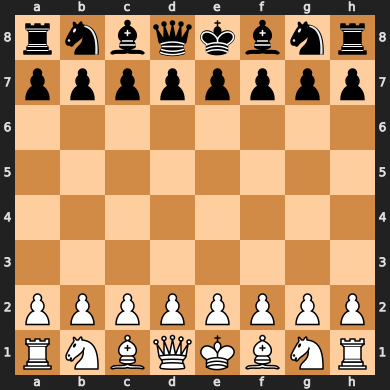

Es tu turno, dame un movimiento: d2d3
evaluacion=  50.23052219967965


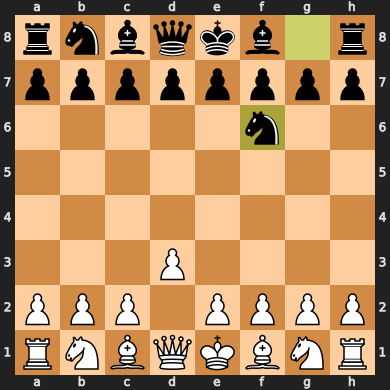

Es tu turno, dame un movimiento: h2h3
evaluacion=  50.23595553875177


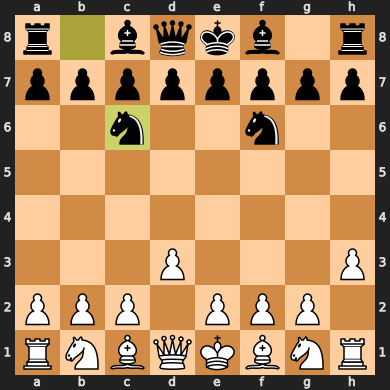

Es tu turno, dame un movimiento: c1g5
evaluacion=  50.3777973995265


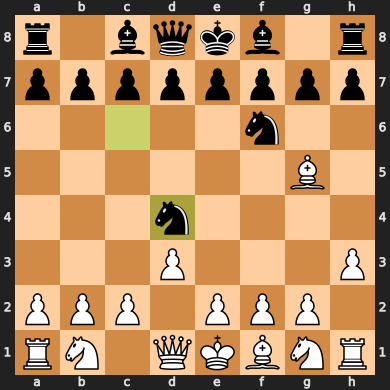

Es tu turno, dame un movimiento: e1d2
evaluacion=  50.4123836983593


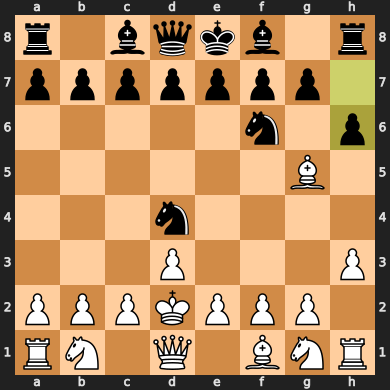

Es tu turno, dame un movimiento: g5f4
evaluacion=  50.42402780962539


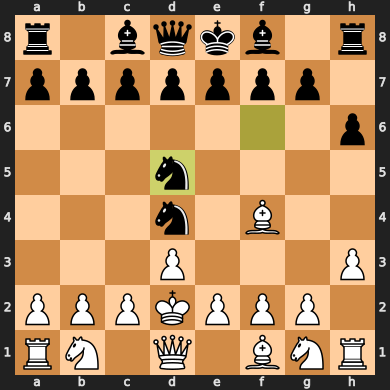

Es tu turno, dame un movimiento: f4e5
evaluacion=  50.32239799908851


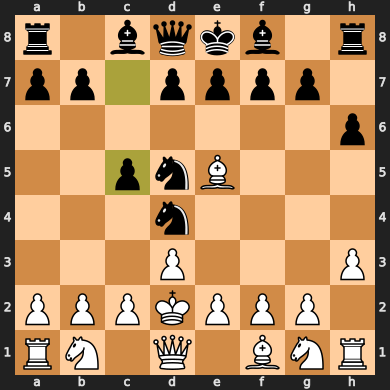

Es tu turno, dame un movimiento: f2f3
evaluacion=  50.34981942315011


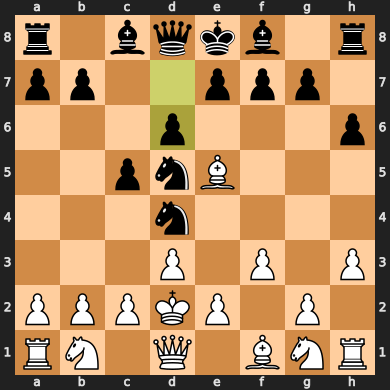

Es tu turno, dame un movimiento: e5d4
evaluacion=  50.35695100352531


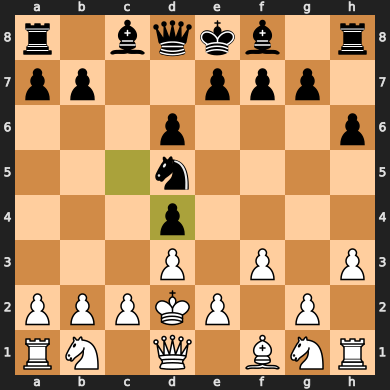

Es tu turno, dame un movimiento: c2c3
evaluacion=  50.583043772484324


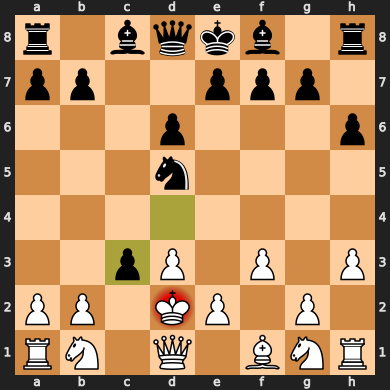

Es tu turno, dame un movimiento: b1c3
evaluacion=  50.75484981689805


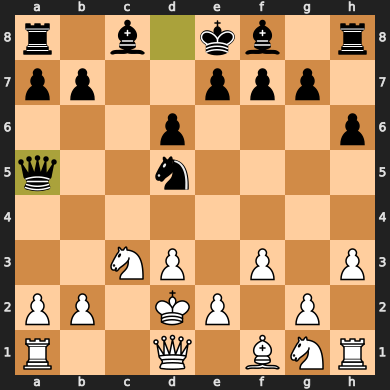

Es tu turno, dame un movimiento: d1a4
evaluacion=  50.720882860617834


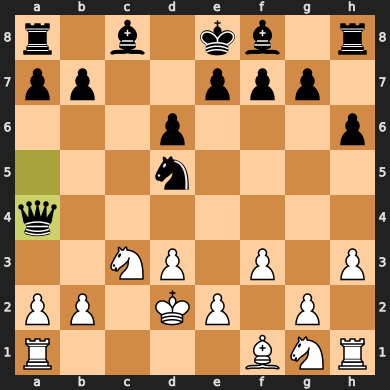

Es tu turno, dame un movimiento: c3a4
evaluacion=  50.7858277390992


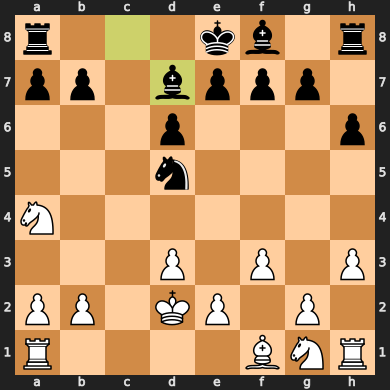

Es tu turno, dame un movimiento: a1c1
evaluacion=  50.883695886512136


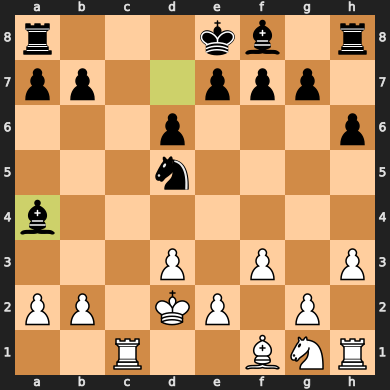

Es tu turno, dame un movimiento: c1c5
evaluacion=  51.563240567433624


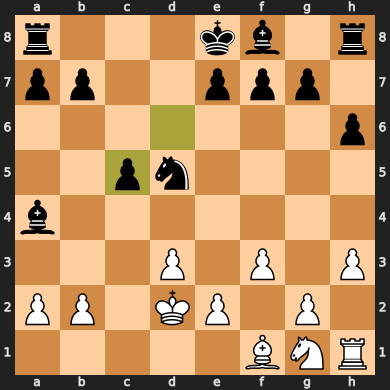

Es tu turno, dame un movimiento: e2e4
evaluacion=  51.71587072667084


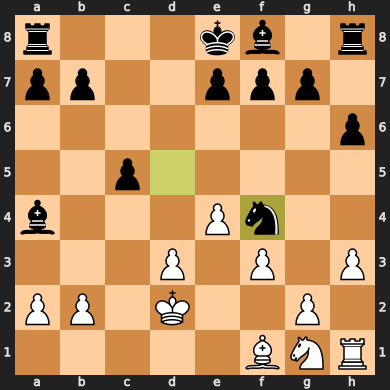

Es tu turno, dame un movimiento: d3d4
evaluacion=  51.8314791752558


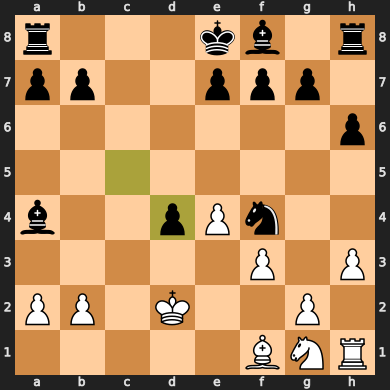

Es tu turno, dame un movimiento: g2g3
evaluacion=  51.90425628433657


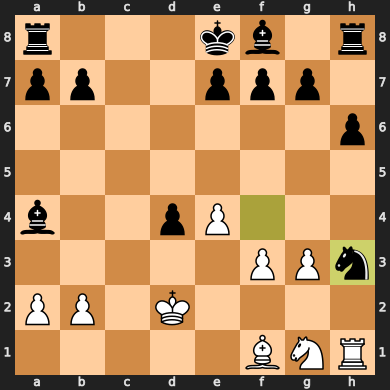

Es tu turno, dame un movimiento: f1c4
evaluacion=  52.46813879487353


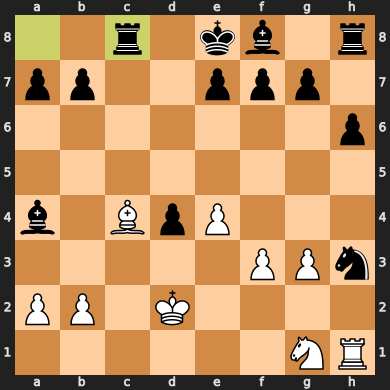

Es tu turno, dame un movimiento: c4d3
evaluacion=  52.834272498529536


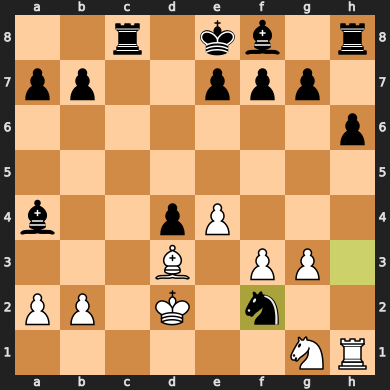

Es tu turno, dame un movimiento: g1h3
evaluacion=  53.17784177212906


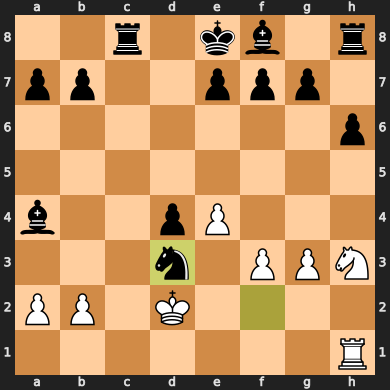

Es tu turno, dame un movimiento: h3f4
evaluacion=  53.22440203182966


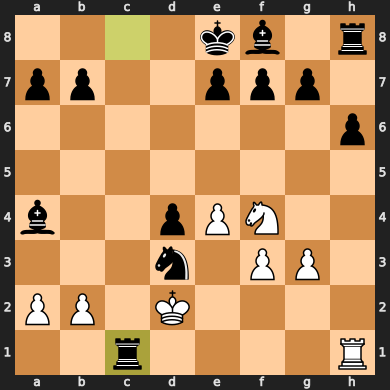

Es tu turno, dame un movimiento: h1c1
evaluacion=  52.424264475399674


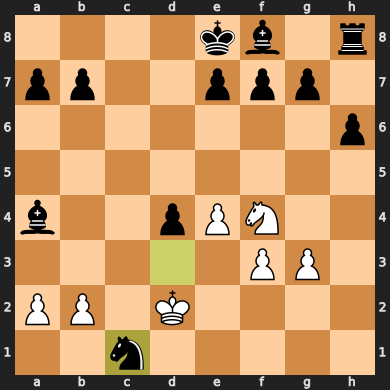

Es tu turno, dame un movimiento: f4e6
evaluacion=  53.513196918608145


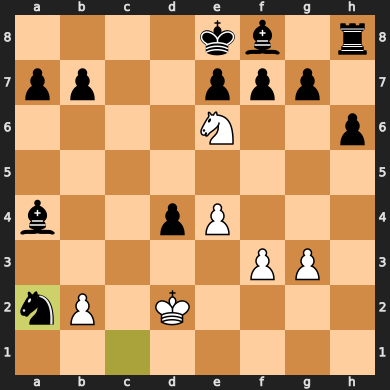

Es tu turno, dame un movimiento: e4e5
evaluacion=  53.813918372719584


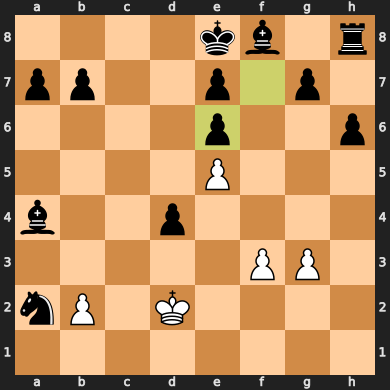

Es tu turno, dame un movimiento: d2d3
evaluacion=  54.35397376608832


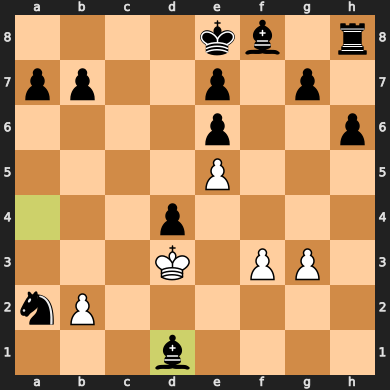

Es tu turno, dame un movimiento: f3f4
evaluacion=  54.711327316366344


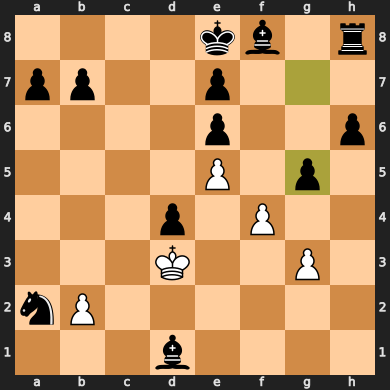

Es tu turno, dame un movimiento: d3d4
evaluacion=  55.4137688479917


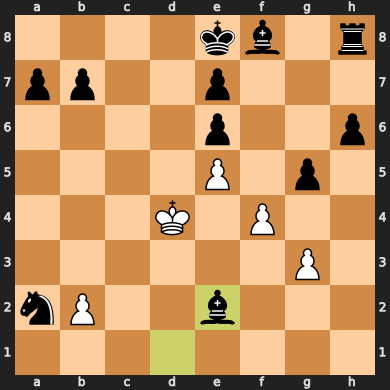

Es tu turno, dame un movimiento: f4f5
evaluacion=  55.768488183114414


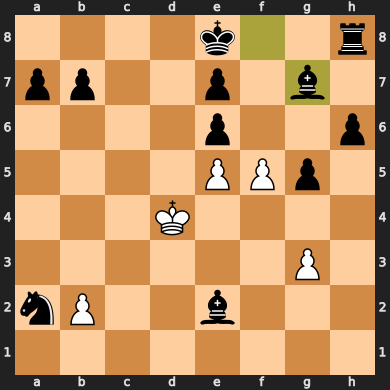

Es tu turno, dame un movimiento: d4e3
evaluacion=  54.843854254778776


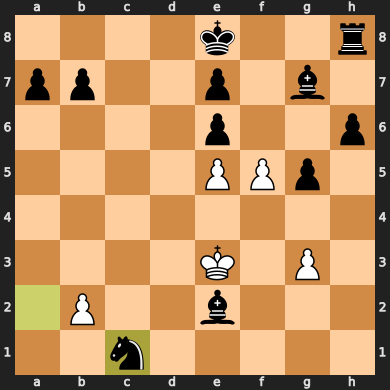

Es tu turno, dame un movimiento: e3f2
evaluacion=  54.472580359019


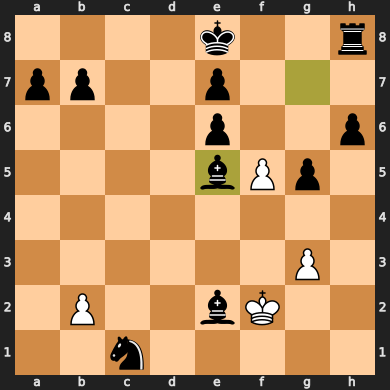

Es tu turno, dame un movimiento: f2g2
evaluacion=  54.472580359019


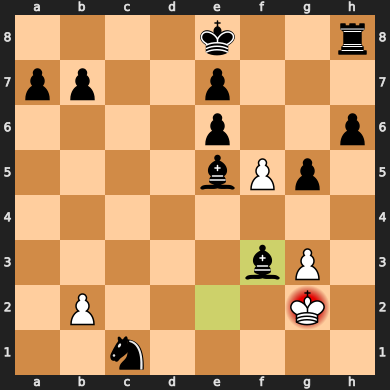

Es tu turno, dame un movimiento: g2f3
evaluacion=  54.76910655422913


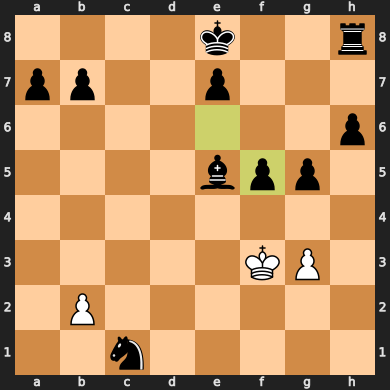

Es tu turno, dame un movimiento: g3g4
evaluacion=  54.84373326124664


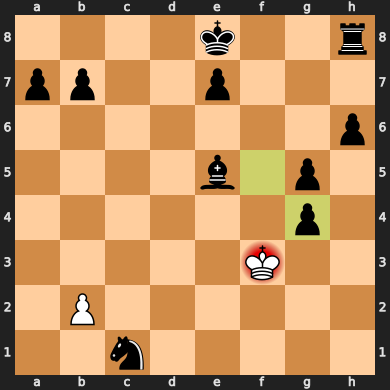

Es tu turno, dame un movimiento: f3g4
evaluacion=  55.19059101939955


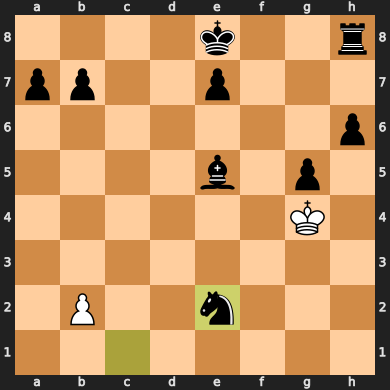

Es tu turno, dame un movimiento: g4f3
evaluacion=  55.16625469203167


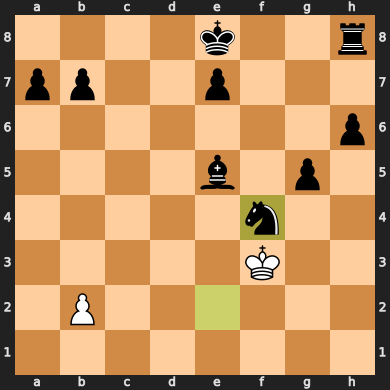

Es tu turno, dame un movimiento: b2b3
evaluacion=  55.58890813164802


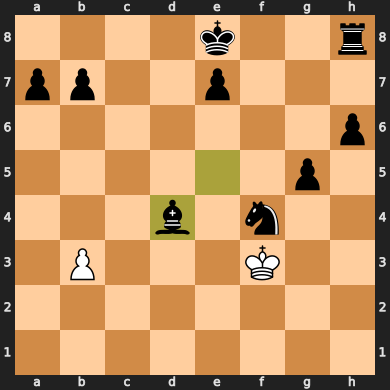

Es tu turno, dame un movimiento: f3e4
evaluacion=  56.17672950557705


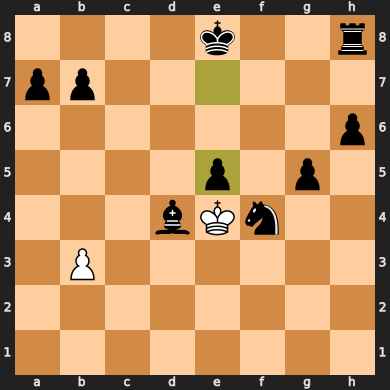

Es tu turno, dame un movimiento: e4f5
evaluacion=  57.703678397835546


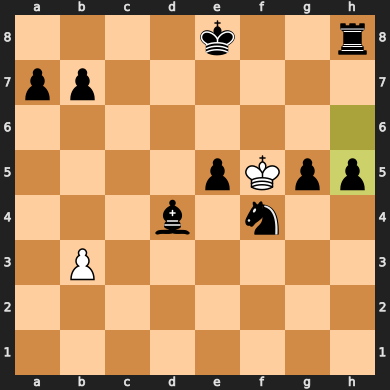

Es tu turno, dame un movimiento: f5f6
evaluacion=  58.65348128356431


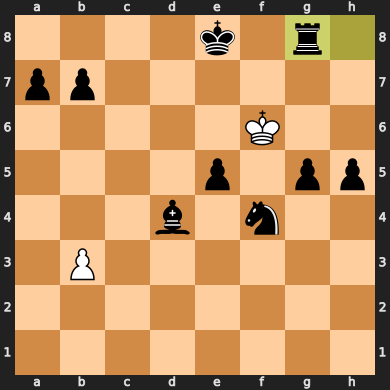

Es tu turno, dame un movimiento: f6f5
evaluacion=  58.65348128356431


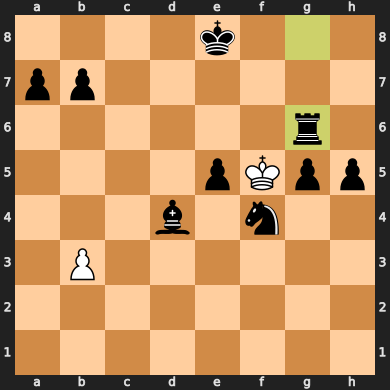

Es tu turno, dame un movimiento: f5e4
evaluacion=  58.77457617169264


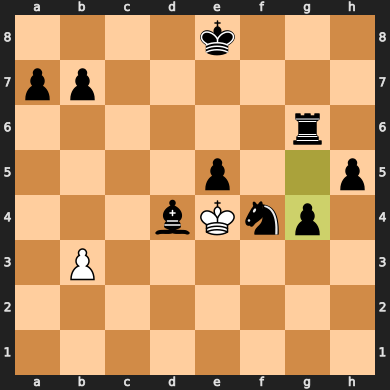

Es tu turno, dame un movimiento: e4f5
evaluacion=  59.30074908861229


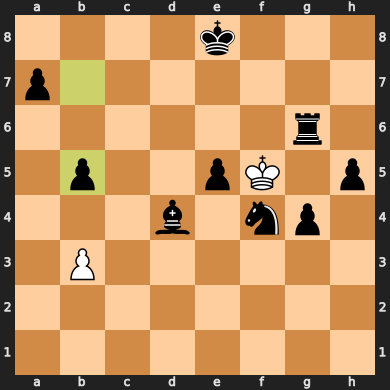

Es tu turno, dame un movimiento: f5e4
evaluacion=  60.40184674465571


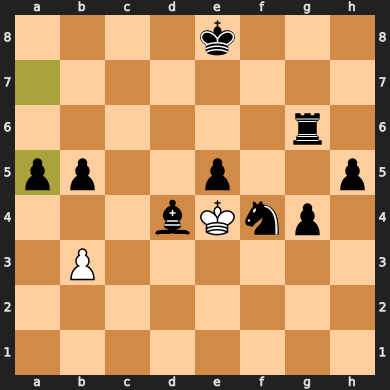

Es tu turno, dame un movimiento: b3b4
evaluacion=  61.06161028964132


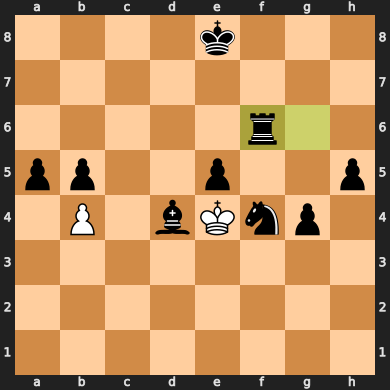

Es tu turno, dame un movimiento: b4a5
evaluacion=  61.46795898085979


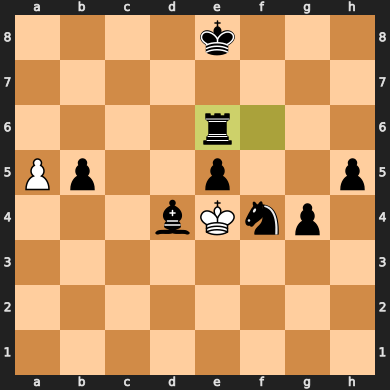

Es tu turno, dame un movimiento: e4f5
evaluacion=  61.06161028964132


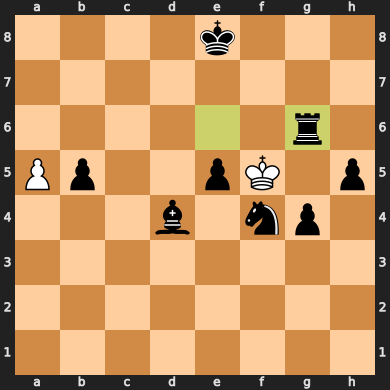

Es tu turno, dame un movimiento: a5a6
evaluacion=  61.46795898085979


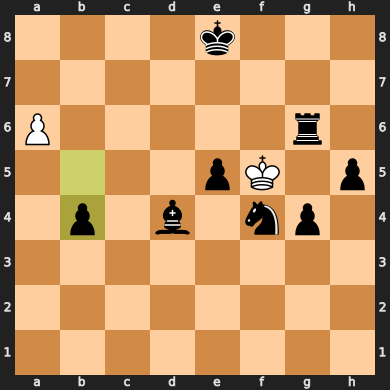

Es tu turno, dame un movimiento: a6a7
evaluacion=  60.67683289666773


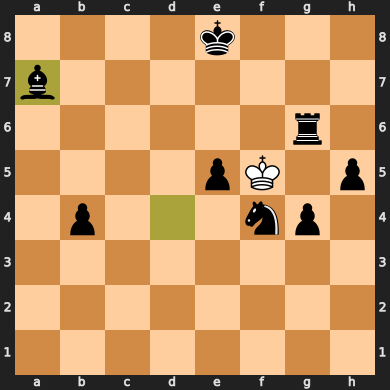

Es tu turno, dame un movimiento: f5e5
evaluacion=  61.46795898085979


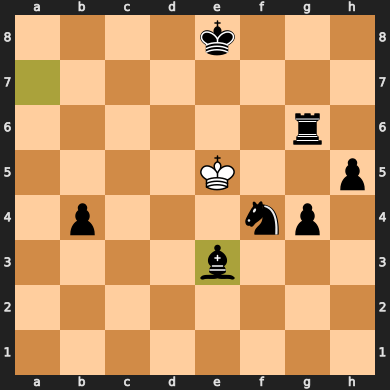

Es tu turno, dame un movimiento: e5f5
evaluacion=  61.46795898085979


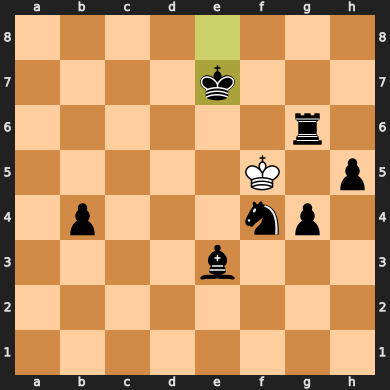

Es tu turno, dame un movimiento: f5e5
evaluacion=  62.348282149331894


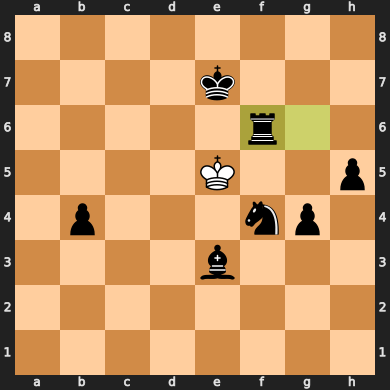

Es tu turno, dame un movimiento: e5e4
evaluacion=  61.896665804947226


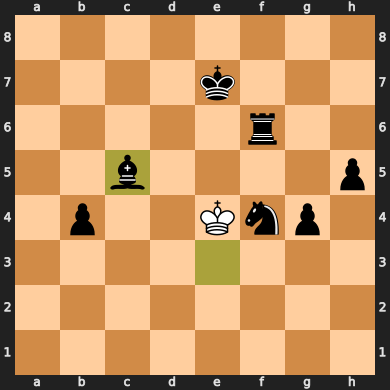

Es tu turno, dame un movimiento: e4e5
evaluacion=  62.348282149331894


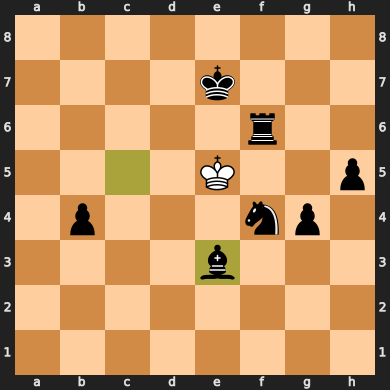

KeyboardInterrupt: ignored

In [ ]:
import chess
from math import inf, exp
import re
import random
from sklearn import preprocessing

class ChessAI():
    # Is better idea to have a board parameter, so instead of creating a new node
    # with a new instance of chess.Board we pass it a variable-state board
    PIECES_HEURISTIC = 0
    MIXED_HEURISTIC = 1

    def __init__(self, board: chess.Board):
        '''
        Pieces:                 Weights
        pawn = chess.PAWN          1
        knight = chess.KNIGHT      2
        bishop = chess.BISHOP      3        
        rook = chess.ROOK          4
        queen = chess.QUEEN        5
        king = chess.KING          6
        '''
        self.board = board
        self.chess_pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
        # stores children for current self.board. Each children is calculated
        # performing the moves in board.legal_moves
        self.children = []

    def __repr__(self):
        # called when doing print(ChessAI instance), e.g. root = ChessAI() print(root)
        return str(self.board)

    def get_moves(self, board=None):
        '''
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @moves (list) = the list of moves of the corresponding turn
        '''
        moves = []
        # for other board (useful when getting son moves)
        if board == None:
            board = self.board

        for move_ in board.legal_moves:
            moves.append(str(move_))
        
        return random.sample(moves,len(moves))
    
    def is_valid_move(self, move:chess.Move, board=None):
        '''
        Checks if a specific move is valid\n
        Parameters:
        @move (chess.Move) = move including start point and end point (i.e. 'g1f3')
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board

        Return:
        @(bool) = if the move is valid
        '''
        if board == None:
            board = self.board
        # Delegate responsability of checking if move is legal in python-chess (Eduardo)
        return board.is_legal(move)
    
    def move(self, move:str, board=None):
        '''
        Makes a move after checking if it's valid\n
        Parameters:
        @move (str) = move to make
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        '''
        if board == None:
            board = self.board

        move_ = chess.Move.from_uci(move)
        if self.is_valid_move(move_, board=board):
            board.push(move_)

    def determine_turn(self, board=None):
        '''
        Gets whose turn is it\n
        Parameters:
        @board (chess.Board) = specify the board you want, if not specified uses
        self.board
        
        Return:
        @(str) = "WHITE" or "BLACK"
        '''
        if board == None: # uses self.board
            board = self.board
        # would be better to return chess.WHITE/chess.BLACK instead of strings? (Eduardo)
        color_turn = "WHITE" if board.turn else "BLACK"

        return color_turn

    def count_pieces(self, chess_piece: chess.PieceType, color, board=None):
        '''
        Counts pieces of a specific piece color in the current state.
        
        '''
        if board == None:
            board = self.board

        # TODO: ¿se puede actualizar la lista de piezas en cada jugada (self.chess_pieces)?
        # a qué te refieres o con qué propósito? (Eduardo)
        # es que estaba pensando que cada vez que se comieran una pieza durante
        # el juego desapareciera de la lista, pero ya vi que no es óptimo hacer 
        # eso jeje
        piece_positions = board.pieces(chess_piece, color)

        return len(piece_positions)

    def get_score(self, color: chess.Color, board=None):
        '''
        Calculate the score for `color` turn as the total weights sum of its
        pieces.

        Parameters
        ---------
        - `color`: the piece color. Can be `chess.WHITE` or `chess.BLACK`
        - `board`: optional parameter that receives another board. If not passed,
        the board associated with these node is used instead

        Returns
        -------
        - `score`: the score for player with `color` pieces
        '''
        if board == None:
            board = self.board

        score = 0
        for chess_piece in self.chess_pieces:
            score += self.count_pieces(chess_piece, color) * chess_piece

        return score

    def pieces_heuristic(self, *, maximize_color = str, board: chess.Board=None) -> int:
        """Calculate the heuristic of a given board as the difference
        between black pieces points and white pieces points. If we are
        maximizing player, then we perform white points - black points.
        black points - white points is performed otherwise.

        Parameters
        ----------
        - `board`: optional instance of chess#Board class. If not passed self.board
        is used
        - `maximize_player`: tells if we're maximizing the player or not

        Returns
        -------
        `h(n)`: an integer representing the heuristic for the given `board`
        """
        # NOTE: We can use the get_score function and pass each color to get the
        # scores
        # UPDATE: functionality implemented as mentioned in NOTE (Eduardo)

        # Calculate white and black pieces points
        white_points = self.get_score(chess.WHITE)
        black_points = self.get_score(chess.BLACK)

        if maximize_color=="WHITE":
            h = white_points - black_points
        else:
            h = black_points - white_points

        return h

    def sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def pawn_promotion(self, color: str):
        # Opción 1:
        #   solo retornar el nearest_pawn
        # Opción 2:
        #   retornar suma de las distancias
        #   entre menor sea la distancia mejor

        # **NOTA**: necesitamos normalizar las medidas que usemos para el score
        # porque por ejemplo el score de piezas va a dar un numero por ejemplo
        # 15, y el de pawn_promotion puede dar 48 si se aplica la opción 2, 
        # por lo que podría dar más bias al de peones y muy poco al de score.
        # Normalizando cada medida, podemos posteriormente darle pesos
        # 0.2*pieces_heuristic + 0.8*pawn_promotion
        # o algo así

        white_pawns_goal = {
            'a': chess.A8, 'b': chess.B8, 'c': chess.C8, 'd': chess.D8, 
            'e': chess.E8, 'f': chess.F8, 'g': chess.G8, 'h': chess.H8}
        black_pawns_goal = {
            'a': chess.A1, 'b': chess.B1, 'c': chess.C1, 'd': chess.D1, 
            'e': chess.E1, 'f': chess.F1, 'g': chess.G1, 'h': chess.H1}

        if color == "WHITE":
            goal = white_pawns_goal
            color_ = chess.WHITE
        else:
            goal = black_pawns_goal
            color_ = chess.BLACK

        piece_positions = self.board.pieces(chess.PAWN, color_)
        min_distance = 1000
        #sum_distances = 0
        for piece in piece_positions:
            pawn_square_name = chess.square_name(piece)
            pawn_square = chess.SQUARE_NAMES.index(pawn_square_name)
            distance = chess.square_distance(pawn_square, goal[pawn_square_name[0]])
            
            if distance < min_distance:
                min_distance = distance

            #sum_distances += distance

        #if sum_distances == 0: ## no peones
        #    sum_distances = 1000 ##

        #return sum_distances # menor es mejor
        return min_distance

    # TODO: hacer función get_distance como la de 8-puzzle porque square_distance 
    # solo saca la distancia a la misma linea 
    def manhattan_distance(self, piece1_name:str, piece2_name:str):
        # square_name_1 -> (str)
        """
        Distance from piece1 to piece2

        a8 b8 c8 d8 e8 f8 g8 h8   |   56 57 58 59 60 61 62 63   |   
        a7 b7 c7 d7 e7 f7 g7 h7   |   48 49 50 51 52 53 54 55   |   
        a6 b6 c6 d6 e6 f6 g6 h6   |   40 41 42 43 44 45 46 47   |   
        a5 b5 c5 d5 e5 f5 g5 h5   |   32 33 34 35 36 37 38 39   |   
        a4 b4 c4 d4 e4 f4 g4 h4   |   24 25 26 27 28 29 30 31   |   
        a3 b3 c3 d3 e3 f3 g3 h3   |   16 17 18 19 20 21 22 23   |   
        a2 b2 c2 d2 e2 f2 g2 h2   |   8  9  10 11 12 13 14 15   |   
        a1 b1 c1 d1 e1 f1 g1 h1   |   0  1  2  3  4  5  6  7    |   
        """
        manhattan_dist = 0 # a manhattan distance sums distance in columns and rows
        
        # piece1_name -> row_dir -> col_dir
        row_dir = piece2_name[0] + piece1_name[1]
        col_dir = row_dir[0] + piece2_name[1]
        
        piece1_square = chess.SQUARE_NAMES.index(piece1_name)
        row_dir_square = chess.SQUARE_NAMES.index(row_dir)
        col_dir_square = chess.SQUARE_NAMES.index(col_dir)
        
        distance_row = chess.square_distance(piece1_square, row_dir_square)
        distance_col = chess.square_distance(row_dir_square, col_dir_square)

        manhattan_dist = distance_row + distance_col

        return manhattan_dist

    def manhattan_heuristic(self, color:str):
        # suma de distancias de piezas a rey oponente
        if color == "WHITE":
            opponent_king = self.board.king(chess.BLACK)
            color_int = chess.WHITE
        else:
            opponent_king = self.board.king(chess.WHITE)
            color_int = chess.BLACK
        
        king_square_name = chess.square_name(opponent_king)
        #print("Celda rey: ", king_square_name)

        sum_ = 0
        for piece in self.chess_pieces:
            try:
                pieces_positions = self.board.pieces(piece, color_int)
                #print(pieces_positions)
                for piece_ in pieces_positions:
                    piece_str = chess.square_name(piece_)
                    #print("Celda pieza: ", piece_str)
                    dist = self.manhattan_distance(piece_str, king_square_name)
                    sum_ += dist
                    #print(dist)
            except:
                continue

        return sum_

    def try_jaque(self):
        # mayor peso si el movimiento pone en jaque
        is_jaque = self.board.is_check()#self.board.gives_check(move) # board.gives_check(move)
        val = 0
        if is_jaque:
            val = 10
        return val

    def try_jaquemate(self, maximizer_color):
        # peso infinito si el movimiento da jaquemate
        val = 0
        ###
        # creo que is_checkmate() solo checa si hay mate, pero sin importar quien
        # lo haga, ver función que devuelva si es jaquemate al rey opuesto
        ###
        if maximizer_color == 'WHITE':    
            if self.determine_turn() == 'BLACK' and self.board.is_checkmate():
                val = 100_000
        else:
            if self.determine_turn() == 'WHITE' and self.board.is_checkmate():
                val = 100_000
        #if self.board.is_checkmate():
        #    val = 100_000
        return val

    def heuristic(self, maximize_color: str):
        # w0 = pieces_heuristic         0.6
        # w1 = pawn_promotion           0.1
        # w2 = manhattan_heuristic      0.2
        # w3 = try_jaque                0.05
        # w4 = try_jaquemate            0.05

        weights = [0.8, 0.2, 0.0, 0.0, 0.1]
        data = [self.pieces_heuristic(maximize_color=maximize_color), 
                self.pawn_promotion(maximize_color),
                self.manhattan_heuristic(maximize_color),
                self.try_jaque(),
                self.try_jaquemate(maximize_color)]
        #print(data)        
        normalized_data = preprocessing.normalize([data])
        #print(normalized_data)
        # la inversa de un valor pequeño devuelve un valor grande y viceversa
        sum_ = weights[0]*normalized_data[0][0] + \
               weights[1]*(normalized_data[0][1]) + \
               weights[2]*(normalized_data[0][2]**(-1)) + \
               weights[3]*normalized_data[0][3] + \
               weights[4]*normalized_data[0][4]
        
        #sum_ = weights[0]*data[0] + \
        #       weights[1]*(data[1]**(-1)) + \
        #       weights[2]*(data[2]**(-1)) + \
        #       weights[3]*data[3] + \
        #       weights[4]*data[4]

        prob = self.sigmoid(sum_) * 100
        return prob

    def filter_moves_for(self, piece: chess.PieceType, board: chess.Board=None):
        """
        Filter the moves for the specified chess piece in the
        current board

        Parameters:
        -----------
        - `piece`: chess piece to filter
        - `board`: optionar chess board. If not passed, self.board is used instead

        Returns:
        --------
        A sorted list containing the possible moves UCI strings for the given
        chess piece
        """
        possible_moves = []
        # contains the squares where we can find a piece in current board state
        squares = []
        if board == None:
            board = self.board
        legal_moves = self.get_moves()
        for move in legal_moves:
            # a move contains the start square and ends with the end square
            # for example: g1f3 stands for move piece from g1 to f3
            square = move[:2] # get the start square
            squares.append(square) 
        # as a single piece may have at least 1 possible move
        # we have repeated start squares, so we create a set to delete duplicates
        squares = set(squares)
        # here we filter the moves to store just the ones associated
        # with piece we are interested in
        filter_piece_positions = lambda square: board.piece_type_at(chess.parse_square(square)) == piece
        piece_positions = list(filter(filter_piece_positions, squares)) # stores each start square of the piece
        for move in legal_moves:
            for piece_position in piece_positions:
                if move.startswith(piece_position):
                    possible_moves.append(move)
        return sorted(possible_moves)

    def copy_board(self):
        return self.board.copy()

    def minimax(self, depth: int, maximize_player: bool,maximize_color: str, heuristic_type: int,board=None):
        #Calculas el mejor movimiento de acuedo a la heurìstica implementada
        #Se calcula de forma recursiva
            
        if board == None:  # uses self.board
            board = self.board
        #esta es nuestra condicion de paro, donde esta nos devolverà la heuristica
        if depth == 0 or board.is_game_over():
            #return None, self.pieces_heuristic(maximize_color=maximize_color)
            if heuristic_type == ChessAI.PIECES_HEURISTIC:
                return None, self.pieces_heuristic(maximize_color=maximize_color)
            if heuristic_type == ChessAI.MIXED_HEURISTIC:
                return None, self.heuristic(maximize_color=maximize_color)
        #Obtenemos todos los movimientos legales e inicializamos el mejor movimiento conn uno random
        #legal_moves = [str(move) for move in board.legal_moves]
        legal_moves = self.get_moves()
        best_move = random.choice(legal_moves) # 
        
        #Calcula el mejor movimiento dependiendo del maximize_player, de manera recursiva
        if maximize_player:
            max_eval = -inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, False,maximize_color, heuristic_type)[1]
                #print("current_eval= ",current_eval,"\n")
                board.pop()
                if current_eval > max_eval:
                    max_eval = current_eval
                    best_move = move
            return best_move, max_eval
        else:
            min_eval = inf
            for move in legal_moves:
                move_ = chess.Move.from_uci(move)
                board.push(move_)
                current_eval = self.minimax(depth - 1, True,maximize_color, heuristic_type)[1]
                board.pop()
                if current_eval < min_eval:
                    min_eval = current_eval
                    best_move = move
            return best_move, min_eval

    def get_children(self):
        '''
        Gets son nodes after expanding the current node. Son nodes are stored
        at self.children.

        Returns
        -------
        The number of children for this node
        '''
        for move in self.board.legal_moves:
            board_copy = self.copy_board()
            board_copy.push(move)
            self.children.append(ChessAI(board_copy))

        return len(self.children)
    
root = ChessAI(chess.Board())
#root.get_children()
#for child in root.children:
#    white_points = child.pieces_heuristic(maximize_player=True)
#    black_points = child.pieces_heuristic(maximize_player=False)
#    print(f'white score = {white_points}, black score = {black_points}')
#    display(child.board)
#    print()

game=True
while game:
    if root.board.is_game_over():
        game=False
        break
    
    display(root.board)
    move=input("Es tu turno, dame un movimiento: ") # input lee la entrada como string, no es necesario usar str()
    if move == 'stop':
        game = False
        continue
    while re.search(r'[a-h][1-8][a-h][1-8]', move) is None or not move in root.get_moves(): # verifica que sea valido
        move=input("Oops! Prueba con otro movimiento: ")
    root.move(move)
    '''best_move,evaluacion=root.minimax(3, True, "WHITE", ChessAI.PIECES_HEURISTIC)
    #best_move,evaluacion=root.minimax(2, False, "BLACK")
    root.move(best_move)
    display(root.board)
    print("evaluacion= ",evaluacion)'''
    #print(root.board)

    best_move,evaluacion=root.minimax(3, True, "BLACK", ChessAI.MIXED_HEURISTIC)
    #best_move,evaluacion=root.minimax(2, False, "BLACK")
    root.move(best_move)
    print("evaluacion= ",evaluacion)

    '''seguir = bool(int(input('Seguir (1)')))
    if not seguir:
        game = False'''
    #move=input("Es tu turno, dame un movimiento: ") # input lee la entrada como string, no es necesario usar str()
    #if move == 'stop':
    #    game = False
    #    continue
    #while re.search(r'[a-h][1-8][a-h][1-8]', move) is None or not move in root.get_moves(): # verifica que sea valido
    #    move=input("Oops! Prueba con otro movimiento: ")
    #root.move(move)